# 0.0 Imports

## 0.1 Helper Functions

In [1]:
import pandas as pd
import inflection               # o módulo inflection é usado para manipular strings
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from IPython.core.display import HTML
from IPython.display import Image

## 0.2 Loading data

In [2]:
# o parâmetro 'low_memory' indica como deve ser feita a leitura do arquivo para memória RAM.

# True  -> carrega o arquivo em chunks - pedaços em pedaços
# False -> carrega o arquivo de uma só vez

df_sales_raw = df = pd.read_csv('../data/train.csv', low_memory=False)
df_store_raw = df = pd.read_csv('../data/store.csv', low_memory=False)


# merge
df_raw = pd.merge(left=df_sales_raw, right=df_store_raw, how='left', on='Store')

# o comando 'pd.merge()' unirá o dataframe 'df_sales_raw' ao 'df_store_raw' lateralmente sendo que o primeiro
# ficará à esquerda e o segundo à direita. O parâmetro 'how' como será feita a junção e 'on' indica em qual coluna /
# variável a junção será feita. Nesse caso, utilizaremos as chaves (key - valores únicos) da coluna 'Store' do
# dataframe 'df_sales_raw' e o comando 'pd.merge()' colará as linhas que possuírem o mesmo valor de 'Store', na
# prática estamos unindo os dados de vendas e lojas com base no valor de 'Store'.

In [3]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_sales_raw.shape

(1017209, 9)

In [5]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df_store_raw.shape

(1115, 10)

In [7]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
df_raw.shape

(1017209, 18)

Para verificarmos registros selecionados aleatóriamente no nosso dataframe usamos o comando `df.sample()`.

In [9]:
df_raw.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
48277,333,4,2015-06-18,10805,1311,1,1,0,0,a,c,3720.0,2.0,2010.0,0,NaN,NaN,NaN
228518,1059,4,2015-01-08,7670,1069,1,1,0,0,c,a,3380.0,4.0,2013.0,0,NaN,NaN,NaN
963402,828,1,2013-02-18,7155,802,1,1,0,0,d,c,3290.0,12.0,2014.0,0,NaN,NaN,NaN
218278,854,6,2015-01-17,7159,871,1,0,0,0,c,a,4770.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
639658,434,4,2013-12-05,13391,928,1,1,0,0,a,a,13020.0,8.0,2003.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
107723,684,7,2015-04-26,0,0,0,0,0,0,d,c,680.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
377411,938,7,2014-08-03,0,0,0,0,0,1,a,a,2820.0,9.0,2009.0,0,NaN,NaN,NaN
849605,761,5,2013-05-31,11554,1199,1,1,0,0,a,a,2390.0,9.0,2012.0,0,NaN,NaN,NaN
649867,608,2,2013-11-26,8932,1020,1,0,0,0,a,c,18370.0,2.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
714328,399,7,2013-09-29,0,0,0,0,0,0,a,a,5360.0,9.0,2012.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"


# 1.0 Descricao dos Dados

Um bom hábito é criarmos uma cópia do nosso dataframe em cada seção, pois assim preservamos os dados originais e conseguimos ter um controle sobre as mudanças que ocorreram em cada passo.

## 1.1 Rename Columns

In [10]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [11]:
df1 = df_raw.copy()

In [12]:
cols_old = df1.columns

snake_case = lambda x: inflection.underscore(x)  # a função underscore transforma uma string de CamelCase
                                                 # (separação de palavras por letras maiusculas) em snake_case

# aplica a função 'snake_case' aos elementos da coluna 'cols_old'
cols_new = list( map(snake_case, cols_old) )

# renomeia as colunas
df1.columns = cols_new

In [13]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions

In [14]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Columns: {df1.shape[1]}')

Number of Rows: 1017209
Number of Columns: 18


## 1.3 Data Type

In [15]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

Percebemos que coluna de datas está armazenada como string (object). Para converter essa string em data usamos o método `pd.to_datetime()` do pandas.

In [16]:
df1['date'] = pd.to_datetime(df1['date'])

In [17]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [18]:
# o método '.isna()' do dataframe verifica se uma célula do dataframe é vázia, resultando em True caso seja e
# False caso o contrário.
df1.isna()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1017205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1017206,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True
1017207,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True


In [19]:
# em processos matemáticos como a soma, o python faz a equivalência entre os operadores booleanos (True e False)
# com valores inteiros da seguinte forma: (True -> 1) e (False -> 0). Portanto, ao somarmos os valores do dataframe
# visto acima, conseguimos descobrir o número de células True em cada coluna, ou seja, o número de células vazias
# que cada coluna / variável possui.
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Existem maneiras de lidar com os registros que possuem dados faltantes:

* **jogar a linha fora**: apesar de ser uma solução rápida, ela não é muito recomendada pois estaríamos jogando fora muitos dados que poderiam ser úteis na nossa análise.


* **substituir usando alguma medida estatística**: atribui o valor do dados faltante com a média, mediana, moda ou outra medida usando os valores das outras linhas. A técnica escolhida pode variar dependendo da conhecimento de negócio.


* **substituir usando alguma técnica de machine learning**: existem algoritmos que substitui o dado faltante baseado no comportamento da coluna.


* **conhecimento de negócio**: O conhecimento de negócio pode nos ajudar a entender porque o dado está faltante e como poderíamos preenchê-lo.

## 1.5 Fillout NA

No passo anterior vimos que as colunas que possuem dados faltantes são:

* competition_distance
* competition_open_since_month
* competition_open_since_year
* promo2
* promo2_since_week
* promo2_since_year
* promo_interval

In [20]:
df1['competition_distance'].max()

75860.0

In [21]:
# competition_distance

# essa coluna representa a distância ao competidor mais próximo. Um motivo plausível dessa variável estar vázia
# seria de que o competidor mais próximo dessa determinada loja está muito distante, ou não existe. Uma maneira
# levar em conta esse cenário é atribuindo um valor de distância maior que o valor máximo encontrado no dataset,
# nesse dataset a distância máxima é de 75860m, para termos uma boa margem vamos substituir os dados
# por uma distância de 200_000m (aproximadamente 3x a distância máxima).

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200_000 if math.isnan(x) else x)

In [22]:
# competition_open_since_month

# essa coluna nos diz aproximadamente o mês que o competidor mais próximo foi aberto. Existem 2 motivos
# para essa coluna estar vázia, o primeiro seria que a loja não possui um competidor mais próximo e portanto não
# existiria uma data de abertura, e o segundo seria que a loja tem um competidor próximo mas nós não sabemos quando
# ela abriu, pois ela pode ter sido aberta muito antes da nossa loja ou por algum motivo o competidor não possui
# esse dado. Em um primeiro momento atribuíremos o mês da coluna 'date' (indica a data do fechamento de 'sales_raw')
# essa hipótese leva em conta a possibilidade do competidor não existir ainda, mas ele vai abrir uma loja nessa
# data, essa abertura de loja poderia impactar as vendas da nossa loja em médio/longo prazo devido a competição.

# Talvez essa hipótese não faça muito sentido nesse modelo de negócio, e se isso se confirmar verdadeiro ela será
# descartada ou melhorada no próximo ciclo do método CRISP-DS.



# a coluna 'date' é do tipo 'datetime64[ns]' esse tipo de objeto possui um atributo chamado '.month' que
# retorna o mês de uma data. A função lambda retorna o mês contido em 'date' caso a variável
# 'competition_open_since' seja vázia e o valor de 'competition_open_since' caso contrário. 

df1['competition_open_since_month'] = ( df1.apply(lambda x: x['date'].month 
                                                  if math.isnan(x['competition_open_since_month']) 
                                                  else x['competition_open_since_month'], axis=1) )

In [23]:
# competition_open_since_year

# o raciocínio utilizado para essa coluna é o mesmo da anterior, vamos substituir o ano de abertura do concorrente
# com ano marcado em 'date'.

df1['competition_open_since_year'] = ( df1.apply(lambda x: x['date'].year 
                                                 if math.isnan(x['competition_open_since_year']) 
                                                 else x['competition_open_since_year'], axis=1) )

In [24]:
# promo2_since_week

# essa coluna descreve a semana que a loja começou a participar da promo2, que se trata de uma promoção anual 
# períodica que ocorre em certo meses. O raciocínio para preencher esse dado é semelhante ao utilizado nos 2 últimos 
# casos, assumimos que as promoções períodicas de uma determinada loja começaram na semana em que os dados de venda
# foram lançadas no sistema (coluna 'date' que originalmente pertencia à df_sales_raw).

df1['promo2_since_week'] = ( df1.apply(lambda x: x['date'].week 
                                       if math.isnan(x['promo2_since_week']) 
                                       else x['promo2_since_week'], axis=1) )

In [25]:
# promo2_since_year

df1['promo2_since_year'] = ( df1.apply(lambda x: x['date'].year 
                                       if math.isnan(x['promo2_since_year']) 
                                       else x['promo2_since_year'], axis=1) )

In [26]:
# promo_interval

# essa coluna descreve qual o intervalo / meses que a promo2 ficou ativa. Nesse caso, vamos criar uma nova coluna 
# que contém identificará se a promo2 estava ativa no momento do registro, sendo que (0 -> inativa) e (1 -> ativa)
# (consideramos que os dados faltantes em 'promo_interval' não possuíam promo2 durante o ano).


month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


df1['promo_interval'].fillna(0, inplace=True)            # substitui todos os dados faltantes por 0


df1['month_map'] = df1['date'].dt.month.map(month_map)   # cria uma coluna que atribui o mês contida em 'date'


# 'is_promo' é 1 se o mês está contido em 'promo_interval' e 0 caso o contrário, ou seja, essa coluna diz se
# a promo2 estava ativa na data do registro.
df1['is_promo'] = ( df1[['promo_interval', 'month_map']]
                   .apply(lambda x: 0 if x['promo_interval'] == 0 else 
                                    1 if x['month_map'] in x['promo_interval'].split(',') 
                                      else 0, axis=1) )

In [27]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
1015139,160,3,2013-01-02,5726,556,1,0,0,1,d,c,17110.0,11.0,2005.0,0,1.0,2013.0,0,Jan,0
838265,571,1,2013-06-10,5823,470,1,0,0,0,d,a,2110.0,11.0,1995.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",Jun,0
473698,609,6,2014-05-03,3059,337,1,0,0,0,a,a,2070.0,9.0,2007.0,0,18.0,2014.0,0,May,0
155333,349,6,2015-03-14,8854,830,1,0,0,0,c,c,1490.0,4.0,2009.0,0,11.0,2015.0,0,Mar,0
360163,436,4,2014-08-21,5431,612,1,1,0,1,d,a,2300.0,8.0,2014.0,0,34.0,2014.0,0,Aug,0


## 1.6 Change Types

Sempre que fazemos uma operação em cima das colunas é importante chegar se o tipo de dados das colunas manipuladas não foram alteradas, o resultado da operação pode mudar o tipo original.

In [28]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

As colunas `competition_open_since_month` e `competition_open_since_year` estão como float, mas gostaríamos que esses dados fossem do tipo inteiro.

In [29]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year']  = df1['competition_open_since_year'].astype(int)

Vamos repetir o mesmo processo para as colunas `promo2_since_week` e `promo2_since_year`.

In [30]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [31]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical

A descrição estatística dos dados serve para 2 coisas:

    1. Ganhar conhecimento de negócio.
    2. Conseguir detectar alguns erros.

A gente consegue aprender um pouco sobre negócio com a estatística descritiva através de duas grandes métricas: **metricas de dispersão** (ajuda entender o quão espalhados estão os dados em relação a média) e **métricas de tendência central** (descreve uma determinada variável em um único número).

In [32]:
# para criar a tabela de estatística descritiva vamos selecionar todas as colunas que possuem dados numéricos
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [33]:
# dataframe com as variáveis númericas
num_attributes.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


In [34]:
# dataframe com as variáveis categóricas
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


### 1.7.1 Numerical Attributes

In [35]:
# Central Tendency - mean, median
df_mean   = pd.DataFrame( num_attributes.apply( np.mean ) ).T
df_median = pd.DataFrame( num_attributes.apply (np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
df_std   = pd.DataFrame( num_attributes.apply( np.std ) ).T
df_min   = pd.DataFrame( num_attributes.apply( np.min ) ).T
df_max   = pd.DataFrame( num_attributes.apply( np.max ) ).T
df_range = pd.DataFrame( num_attributes.apply( lambda col: col.max() - col.min() ) ).T
df_skew  = pd.DataFrame( num_attributes.apply( lambda col: col.skew() ) ).T
df_kurt  = pd.DataFrame( num_attributes.apply( lambda col: col.kurt() ) ).T

# concatenate
df_stat = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurt]).T
df_stat.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

df_stat

,min,max,range,mean,median,std,skew,kurtosis
store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [36]:
sns.set(rc = {'figure.figsize': (15, 8)})

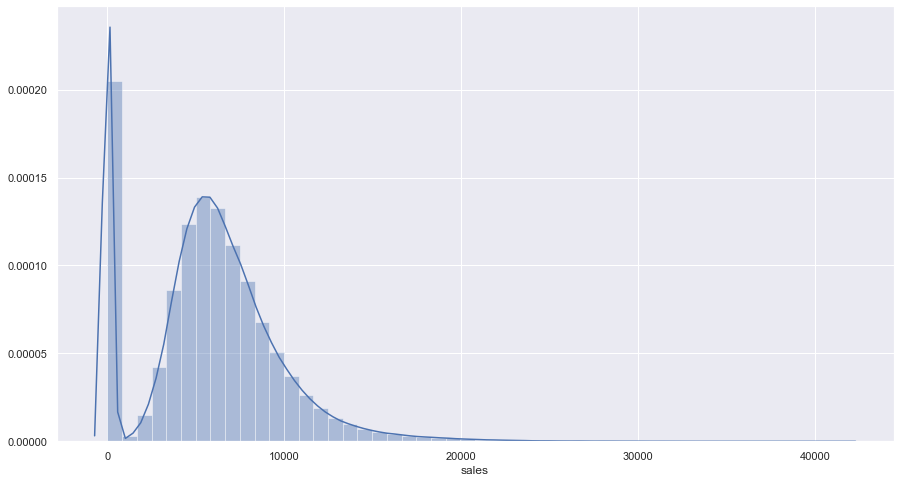

In [37]:
sns.distplot(df1['sales'])

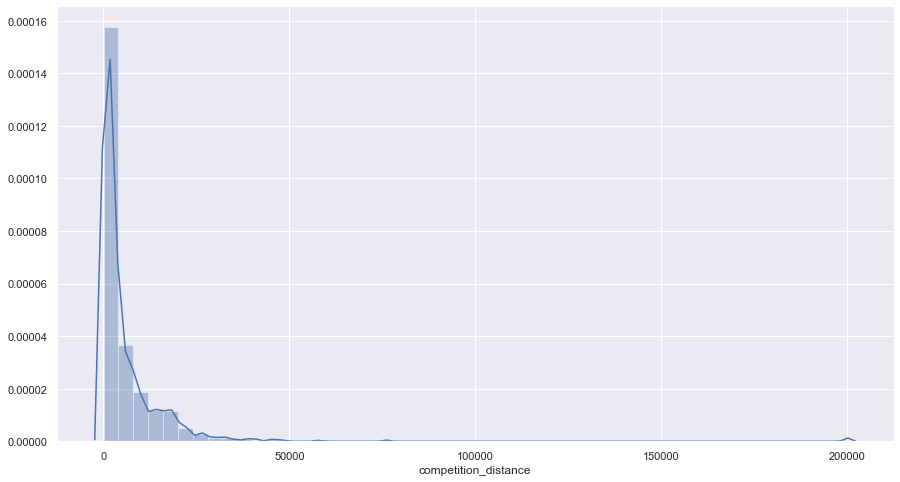

In [38]:
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [39]:
cat_attributes.apply(lambda col: col.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

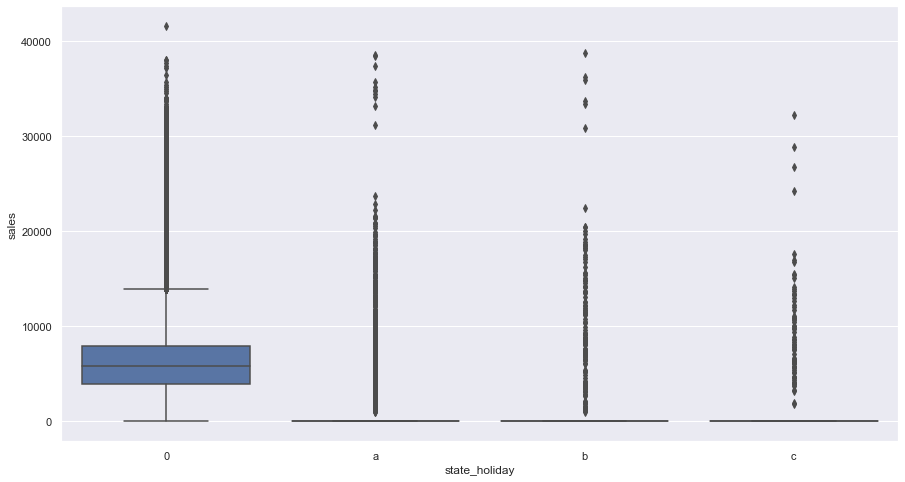

In [40]:
sns.boxplot(data=df1, x='state_holiday', y='sales')

O gráfico acima não dá para enxergar muito bem, isso acontece porque os ranges (intervalos) são muito diferente para cada variável. Para facilitar a visualização vamos filtrar os dados e selecionar apenas os dias que tiveream feríado (classes `a`, `b` ou `c`).

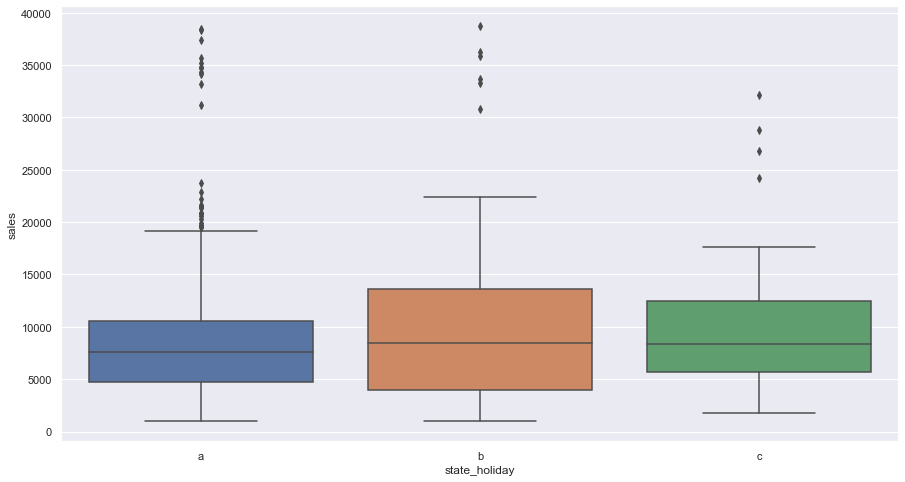

In [41]:
df_aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

sns.boxplot(data=df_aux, x='state_holiday', y='sales')

Vamos plotar todos os gráficos:

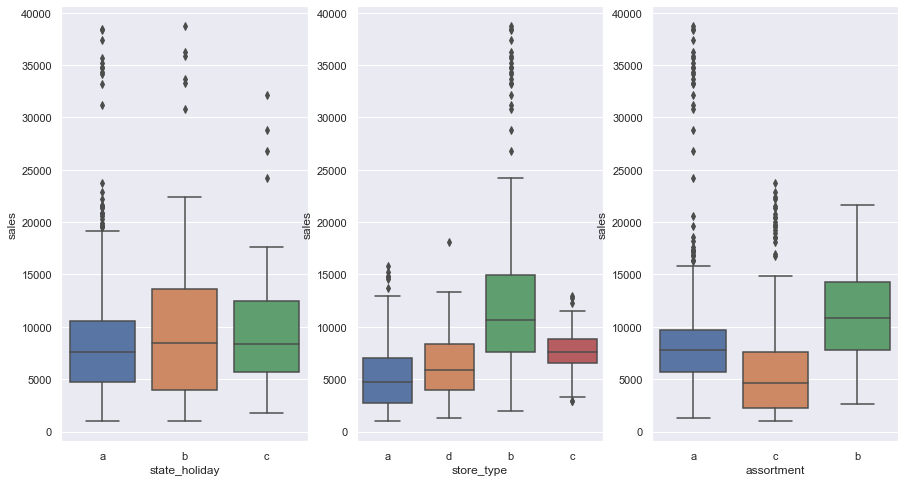

In [42]:
fig, ax = plt.subplots(1, 3)

sns.boxplot(data=df_aux, x='state_holiday', y='sales', ax=ax[0])
sns.boxplot(data=df_aux, x='store_type',    y='sales', ax=ax[1])
sns.boxplot(data=df_aux, x='assortment',    y='sales', ax=ax[2])

# 2.0 Feature Engineering

In [43]:
df2 = df1.copy()

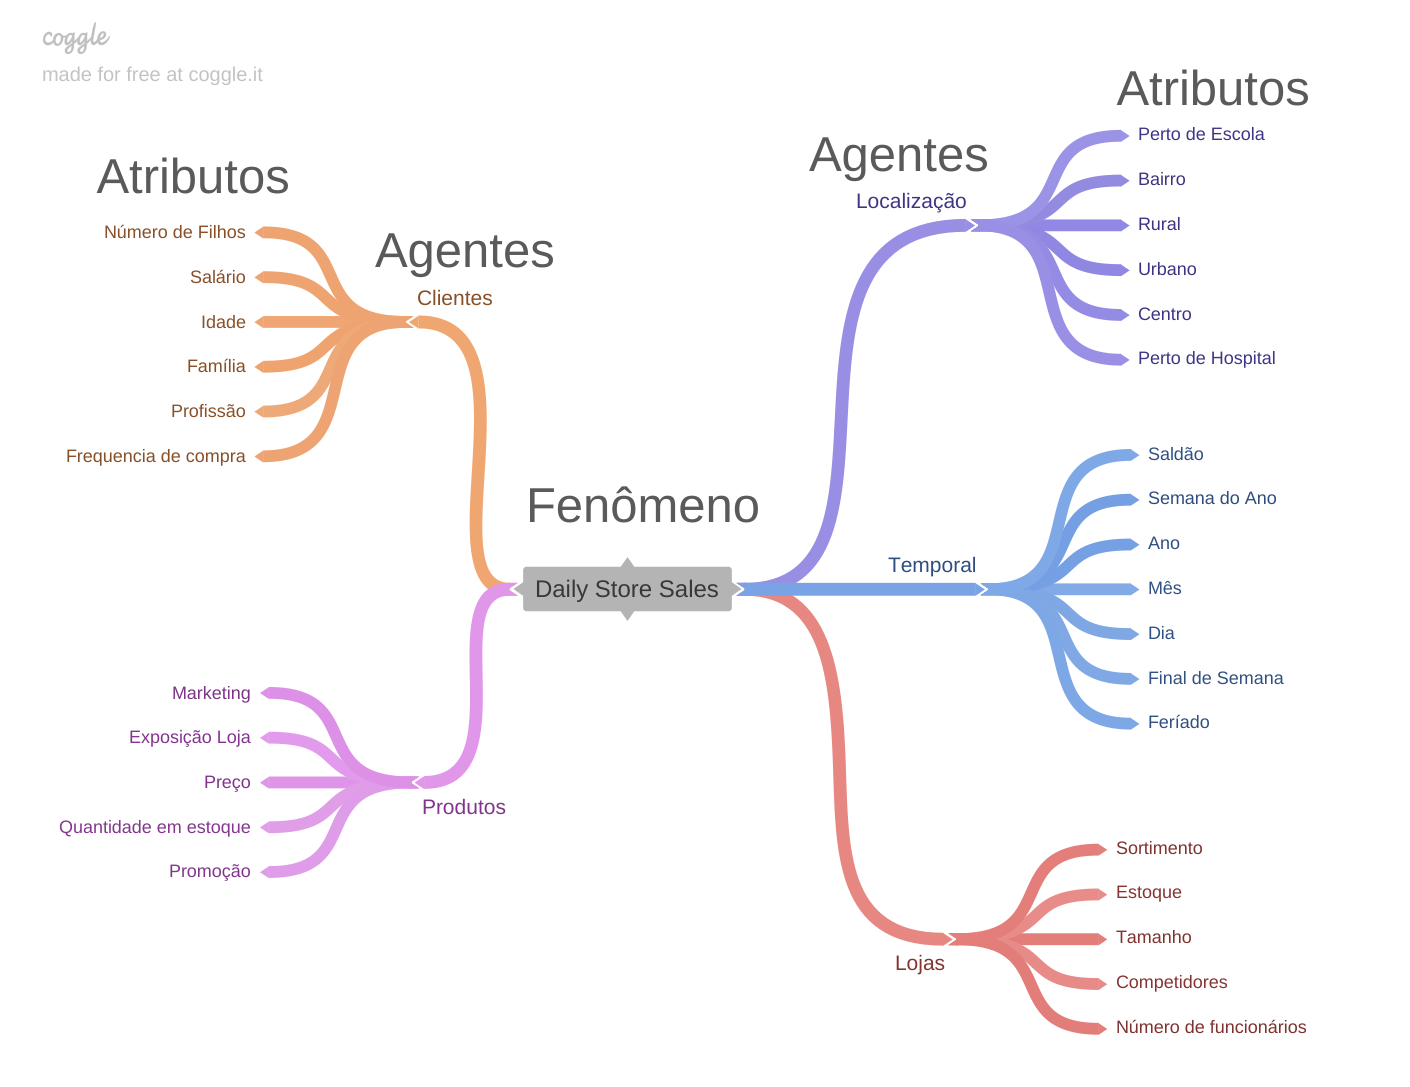

In [44]:
Image('../img/MindMapHypothesis.png')

## 2.1 Criação de Hipóteses

Vamos criar as hipóteses em cima de 3 agentes:

    1. Loja
    2. Produto
    3. Temporal

### 2.1.1 Hipóteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais

**3.** Lojas com maior porte deveriam vender mais

**4.** Lojas com maior sortimento deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores a mais tempo deveriam vender mais.

### 2.1.1 Hipóteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição do produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.1.1 Hipóteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.2 Lista Final de Hipóteses

Nessa seção iremos priorizar as hipóteses que serão utilizadas na análise exploratória dos dados.

A priorização será feita de acordo com a reposta da pergunta.
* Eu tenho o dado necessário para validar a hipótese nesse momento?
    * Sim - Prioriza essa hipótese no momento.
    * Não - Não utiliza hipótese no momento (mas ela pode ser útil na segunda iteração do ciclo)

**Lista Final**

* **Loja**

    * **4.** Lojas com maior sortimento deveriam vender mais.

    * **5.** Lojas com competidores mais próximos deveriam vender menos.

    * **6.** Lojas com competidores a mais tempo deveriam vender mais.
    
    
* **Produto**

    * **6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

    * **7.** Lojas com mais dias de promoção deveriam vender mais.

    * **8.** Lojas com mais promoções consecutivas deveriam vender mais.
    
    
* **Tempo**

    * **1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

    * **2.** Lojas deveriam vender mais ao longo dos anos.

    * **3.** Lojas deveriam vender mais no segundo semestre do ano.

    * **4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

    * **5.** Lojas deveriam vender menos aos finais de semana.

    * **6.** Lojas deveriam vender menos durante os feriados escolares.

**Hipóteses**

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais. 

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Feature Engineering

Nesse passo vamos derivar as seguintes variáveis:

* `year`
* `month`
* `day`
* `week_of_year`
* `year_week`

Variáveis que vão dizer quanto tempo desde a data atual (data da compra) desde que o competidor / promoção começou.
* `competition_since` / `competition_time_month`
* `promo_since` / `promo_time_week`

Vamos mudar essas variáveis de enconder para extenso.
* `assortment`
* `holiday`

In [45]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0


In [46]:
df2.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo'],
      dtype='object')

In [47]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')  # o metodo 'strftime' converte um datetime em string de acordo
                                                     # com o formato passado como parâmetro, nesse caso temos 
                                                     # Year-Week.

In [48]:
df2.head().T.tail()

,0,1,2,3,4
year,2015,2015,2015,2015,2015
month,7,7,7,7,7
day,31,31,31,31,31
week_of_year,31,31,31,31,31
year_week,2015-30,2015-30,2015-30,2015-30,2015-30


In [49]:
# competition_since / competition_time_month

# nessa variável queremos saber o intervalo de tempo entre a data de venda 'date' e a data de abertura do
# concorrente. Para obtermos o segundo dado, precisamos combinar os dados das colunas 
# 'competition_open_since_month' e 'competition_open_since_year'. Após juntarmos as colunas vamos subtrair as duas
# datas para obtermos o intervalo de tempo.

df2['competition_since'] = ( df2.apply( 
                                        lambda x: datetime.datetime( 
                                                                    year  = x['competition_open_since_year'], 
                                                                    month = x['competition_open_since_month'], 
                                                                    day   = 1 ),
                                        axis=1 )
                           )
# a diferença entre as colunas (df2['date'] - df2['competition_since']) nos diz quanto dias se passaram entre
# a data de venda e a data de abertura do competidor. Ao dividirmos o número de dias por 30 obtemos o número de
# meses que se passaram, no entanto esse dado fica armazenado em um formato 'timedelta64[ns]' da seguinte maneira
# '84 days 03:12:00', nesse processo o python identifica o resultado da divisão como número de dias ao invés de
# meses. Para acessarmos esse valor basta usar o atributo 'dt.days', esse valor representa o número de meses, ou
# seja, no primeiro registro se passaram 84 meses entre a data da venda e de abertura do competidor,
df2['competition_time_month'] = ( (df2['date'] - df2['competition_since']) / 30 ).dt.days



# ============================================================================================================

# promo_since

# nesse caso temos uma complicação extra, pois só temos disponível as variáveis 'promo2_since_week' e
# 'promo2_since_year', portanto não temos a informação do mês da promoção diretamente.

# transforma os valores das colunas de tempo de promo2 em string e depois concatena no formato 'year-week'
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since'] = ( df2['promo_since'].apply( 
                                                lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') 
                                                        - datetime.timedelta(days=7) 
                                                ) 
                     )
# numero de semanas que a promoção está ativa
df2['promo_time_week'] = ( (df2['date'] - df2['promo_since']) / 7 ).dt.days

In [50]:
df2.head().T.tail()

,0,1,2,3,4
year_week,2015-30,2015-30,2015-30,2015-30,2015-30
competition_since,2008-09-01 00:00:00,2007-11-01 00:00:00,2006-12-01 00:00:00,2009-09-01 00:00:00,2015-04-01 00:00:00
competition_time_month,84,94,105,71,4
promo_since,2015-07-27 00:00:00,2010-03-22 00:00:00,2011-03-28 00:00:00,2015-07-27 00:00:00,2015-07-27 00:00:00
promo_time_week,0,279,226,0,0


### Explicação função usada em `promo_since`

https://stackoverflow.com/questions/32101274/strptime-weeks-error

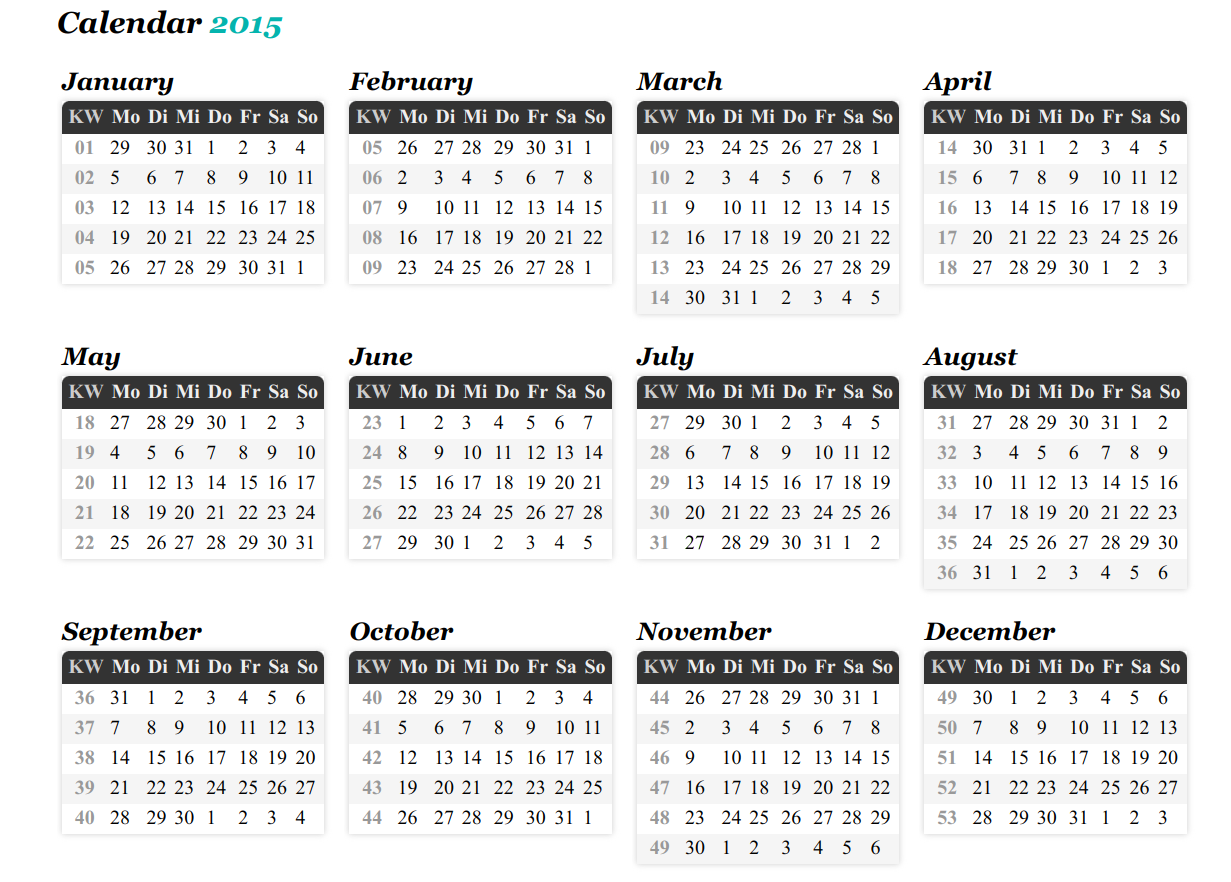

In [51]:
Image('img/weeks_2015.png')

In [52]:
# nesse exemplo estamos uma passando uma string no formato 'Year(%Y) - Week_of_Year(%W) - Day_of_Week (%w)' então
# a string '2015-31-1' representará a data no ano 2015 depois de 31 semanas completas e no dia 1 da semana 
# (segunda-feira). A função 'strptime' converterá a string para um datetime no formato (year, month, day). 
# No entanto esse resultando estaria errado pois 'Week_of_Year(%W)' representa o número de semanas completas,
# portanto a semana 1 do calendário representa a semana 0 do datetime, portanto para representarmos a semana 31
# do ano de 2015 devemos subtrair 7 dias, como efetuado na célula abaixo;
datetime.datetime.strptime('2015-31' + '-1', '%Y-%W-%w')

datetime.datetime(2015, 8, 3, 0, 0)

In [53]:
# agora o resultado está correto, data equivalente a segunda feira da semana 31 do ano de 2015 é dia
# 27/07/2015 como pode ser visto no calendário acima.
datetime.datetime.strptime('2015-31' + '-1', '%Y-%W-%w') - datetime.timedelta(days=7)

datetime.datetime(2015, 7, 27, 0, 0)

Se olharmos no calendário da figura, percebemos a segunda-feira da semana 31 do ano de 2015 corresponde ao dia 27/7/2015.

### Continuação

A variável `assortment` vem com valores codificados em 'a', 'b' e 'c' sendo que cada um representa: 
* a = basic 
* b = extra 
* c = extended

Enquanto que a variável `state_holiday` vem com os seguintes encoders:
* a = public holiday
* b = Easter holiday
* c = Christmas
* 0 = None

In [54]:
df2.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

In [55]:
# assortment
assortment_map = {'a': 'basic', 'b': 'extra', 'c': 'extended'}

df2['assortment'] = df2['assortment'].map(assortment_map)

# state_holiday
holiday_map = {'a': 'public_holiday', 'b': 'easter_holiday', 'c': 'christmas', '0': 'regular_day'}

df2['state_holiday'] = df2['state_holiday'].map(holiday_map)


In [56]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 3.0 Filtragem de Variáveis

In [57]:
df3 = df2.copy()

In [58]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das Linhas

Vamos descartar as linhas / registros que contenham `open=0`, o que indica que a loja estava fechada. Nesse cenário é obvio que as vendas serão nulas e esses dados podem distorcer o valor predito pelo modelo ao final do projeto.

Outra restrição que aplicaremos é o que valor de vendas seja maior que zero, `sales > 0`.

In [59]:
df3 = df3.loc[(df3['open'] != 0) & (df3['sales'] > 0), :]

## 3.2 Seleção das Colunas

A coluna `customers` contém o número de clientes que uma loja teve em um determinado dia. O problema de utilizarmos essa variável no modelo é que no ambiente de produção não teremos essa informação. Por exemplo, não é possível saber quantos clientes cada loja terá daqui a 6 semanas, portanto não podemos utilizar essa variável no modelo, pois não conseguiríamos colocar o seu valor de input no ambiente de produção.

In [60]:
# uma vez que eliminamos todas as linhas com 'open=0' sobraram apenas registros com 'open=1', de modo que essa
# coluna não trará nenhum informação relevante pois todos os seus dados são iguais. As colunas 'promo_interval' e
# 'month_map' foram usadas como auxiliares no processo de criação de outras features, portanto elas não carregam
# nenhum valor em nossa análise.

cols_drop = ['customers', 'open', 'promo_interval', 'month_map']

df3 = df3.drop(cols_drop, axis=1)

In [61]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 Análise Exploratória dos Dados

[Pandas User-Guide (Pivot tables)](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping)

[Exploratory Data Analysis](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

In [62]:
df4 = df3.copy()

## 4.1 Análise Univariada

### 4.1.1 Response Variable

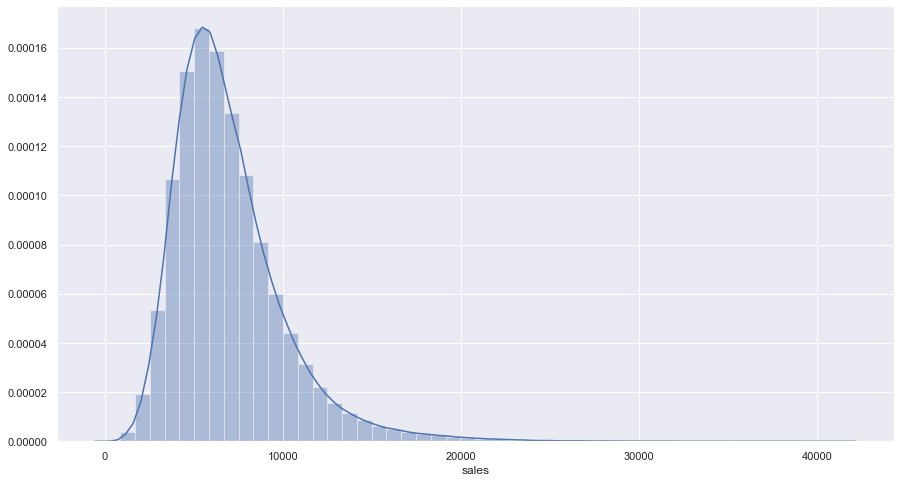

In [85]:
sns.distplot(df4['sales']);

Ao análisarmos a distribuição da variável resposta `sales` percebemos que ela possui um cauda maior à direita, isso indica uma skewness positiva, o que significa que a média é maior que a mediana.

* skew > 0  $\;\; \Rightarrow \;\;$  Mean > Median

Os algoritmos de machine learning são baseados em certas premissas, uma delas é que os dados sejam independentes entre si e que a variável resposta siga uma distribuição normal, quanto mais próximo de uma normal a distribuição da variável resposta for, melhor será performance do modelo.

Nesse caso, apesar de não ser uma distribuição normal perfeita, a curva se assemelha bastante à uma, o que não deve nos causar muitos problemas. 

Se esse não fosse o caso, teríamos que fazer alguma transformação na variável resposta para tentar normalizá-la.

### 4.1.2 Numerical Variables

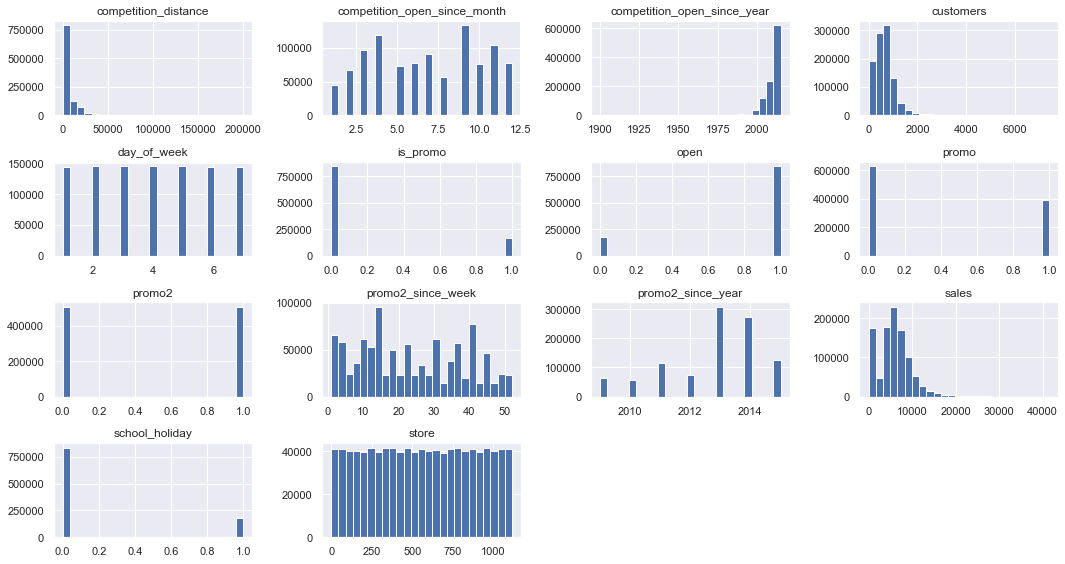

In [86]:
num_attributes.hist(bins=25, layout=(4,4));
plt.tight_layout()

**Quanto mais comportamento uma variável tiver, mais explicativa ela é considerada.**

* `competition_distance` - percebemos que práticamente todos os competidores estão à uma distância menor que 5000, todos os competidores estão muito próximos entre si.


* `competition_open_since_month` - 

In [87]:
type(num_attributes)

pandas.core.frame.DataFrame

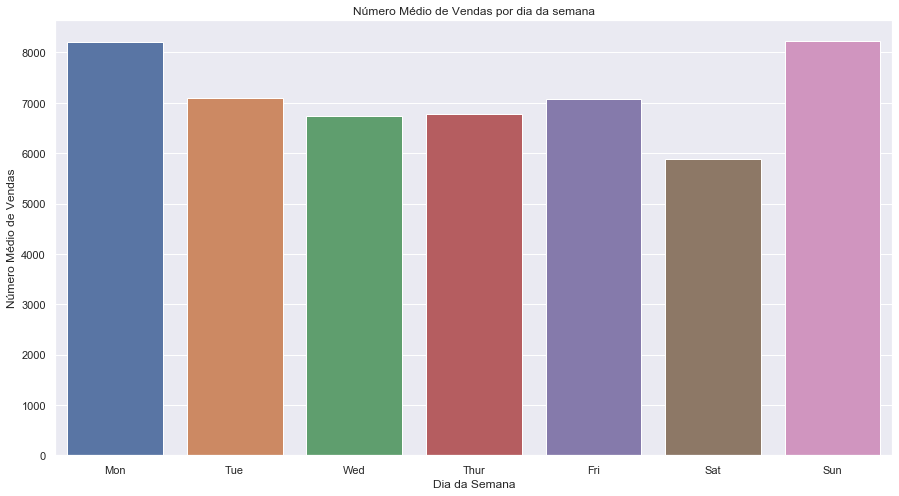

In [88]:
df_plot = df4[['day_of_week', 'sales']].groupby('day_of_week').mean().reset_index()

day_of_week = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

df_plot['day_of_week'] = df_plot['day_of_week'].map(day_of_week)



ax = sns.barplot(data=df_plot, x='day_of_week', y='sales');

ax.set(
    xlabel='Dia da Semana',
    ylabel='Número Médio de Vendas',
    title='Número Médio de Vendas por dia da semana',
);

### 4.1.3 Categorial Variable

In [89]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [90]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

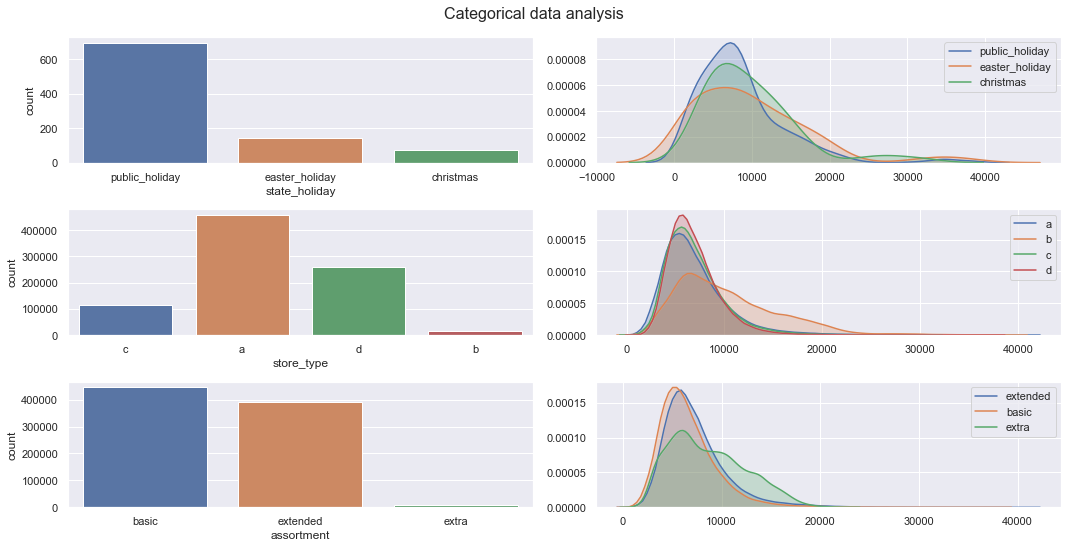

In [91]:
fig, ax = plt.subplots(3, 2)


# state_holiday
sns.countplot(df4.query('state_holiday != "regular_day"')['state_holiday'], ax=ax[0,0])

sns.kdeplot(df4.query('state_holiday == "public_holiday"')['sales'], label='public_holiday', shade=True, ax=ax[0,1])
sns.kdeplot(df4.query('state_holiday == "easter_holiday"')['sales'], label='easter_holiday', shade=True, ax=ax[0,1])
sns.kdeplot(df4.query('state_holiday == "christmas"')['sales'],      label='christmas',      shade=True, ax=ax[0,1])

# store_type
sns.countplot(df4['store_type'], ax=ax[1,0])

sns.kdeplot(df4.query('store_type == "a"')['sales'], label='a', shade=True, ax=ax[1,1])
sns.kdeplot(df4.query('store_type == "b"')['sales'], label='b', shade=True, ax=ax[1,1])
sns.kdeplot(df4.query('store_type == "c"')['sales'], label='c', shade=True, ax=ax[1,1])
sns.kdeplot(df4.query('store_type == "d"')['sales'], label='d', shade=True, ax=ax[1,1])


# assortment
sns.countplot(df4['assortment'], ax=ax[2,0])

sns.kdeplot(df4.query('assortment == "extended"')['sales'], label='extended', shade=True, ax=ax[2,1])
sns.kdeplot(df4.query('assortment == "basic"')['sales'],    label='basic',    shade=True, ax=ax[2,1])
sns.kdeplot(df4.query('assortment == "extra"')['sales'],    label='extra',    shade=True, ax=ax[2,1])

fig.suptitle('Categorical data analysis', fontsize=16)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

O feríado de Natal (`christmas`) possui um pico maior de vendas que a Páscoa (`easter_holiday`).

## 4.2 Análise Bivariada

Na seção 2.3 criamos uma lista de hipóteses:

**Hipóteses**

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais. 

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

### H1. Lojas com maior sortimento deveriam vender mais.

**Falsa** Lojas com MAIOR SORTIMENTO vendem MENOS

In [92]:
df4['assortment'].value_counts()

basic       444875
extended    391254
extra         8209
Name: assortment, dtype: int64

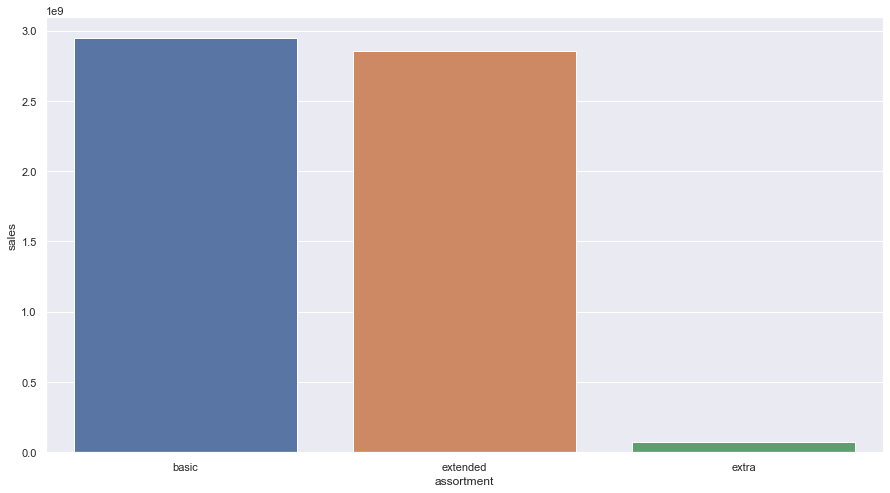

In [93]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()

sns.barplot(data=aux1, x='assortment', y='sales');

Nesse gráfico conseguimos ver que o volume total de vendas é lojas de `assortment` extra vende menos que as de `assortment` basic e extended.

Assortment do nível maior para o menor:
1. extra
2. extended
3. basic.

Percebemos então que o maior assortment possui o menor nível de vendas o que contraria a nossa hipótese.

Será que houve uma mudança de comportamento ao longo do tempo? Digamos que o assortment extra vendia muito no passado mas conforme o tempo o seu volume de vendas foi diminuindo, por isso o seu volume estaria baixo. Vamos investigar essa hipótese.

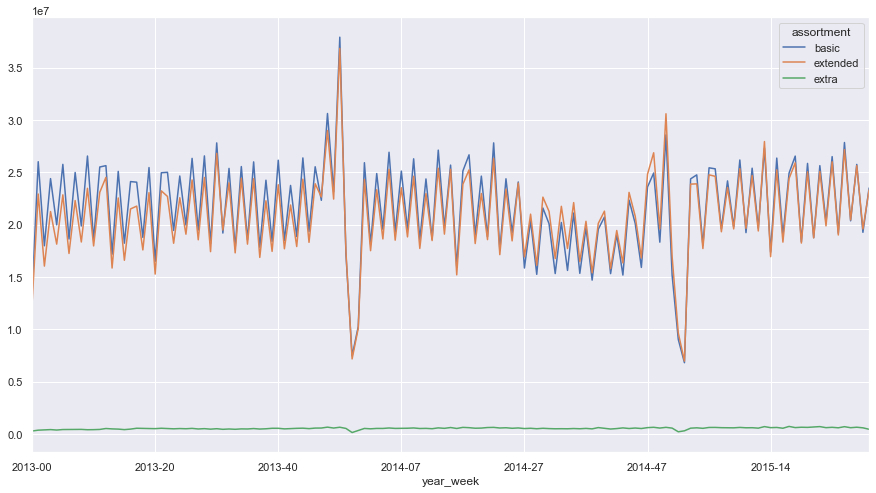

In [94]:
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()

aux3 = aux2.pivot(index='year_week', columns='assortment', values='sales')

aux3.plot();

Pelo gráfico podemos notar que o comportamento dos assortments 'basic' e 'extended' são muito semelhantes conforme as semanas foram passada, isso ajuda a explicar o motivo do volume de vendas ser bem parecidos como foi visto no gráfico de barras. O 'assortment' do extra é bem menor que os outros no gráfico, para entender melhor o seu comportamento, vamos plotar esse assortment separado.

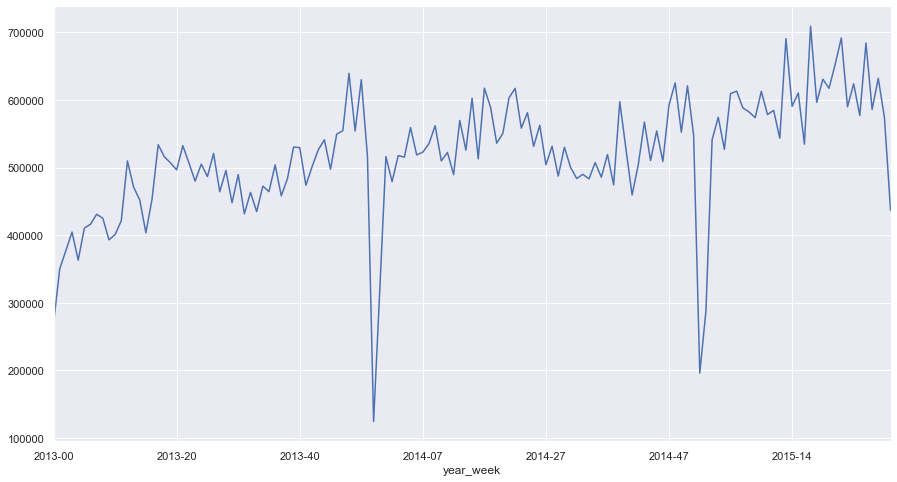

In [95]:
aux3['extra'].plot();

1. Lojas com menor sortimento tem volume de vendas maiores.


2. Os assortments 'basic' e 'extended' se comportarem de maneira igual e o 'extra' possui um comportamento distinto, isso pode trazer uma variabilidade que será útil no treinamento do modelo.

In [96]:
aux2.head()

,year_week,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693


In [97]:
# o método '.pivot()' da classe DataFrame, cria um novo dataframe cujo os índices são os valores únicos da coluna
# passada no parâmetro 'index=', as colunas são os valores único da variável passada em 'columns=' e o valores que
# serão preenchidos são dados da variável passada em 'value=' equivalentes ao par (index, column) do novo dataframe.
aux2.pivot(index='year_week', columns='assortment', values='sales')

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061
...,...,...,...
2015-26,27840342,27165959,684180
2015-27,20356210,20449036,586036
2015-28,25746704,25629698,632017


### H2. Lojas com competidores mais próximos deveriam vender menos.

**Falsa** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS.

In [98]:
df4['competition_distance'].nunique()

655

A variável `competition_distance` é númerica portanto se plotarmos um gráfico de barras comum, obteríamos um gráfico de barras muito granulado pois existem 655 diferentes valores dentro dessa variável. Para "consertar" esse problema, vamos definir intervalos de distância e ver como o número de vendas varia dentro dos intervalos de distâncias dos competidores mais próximos.

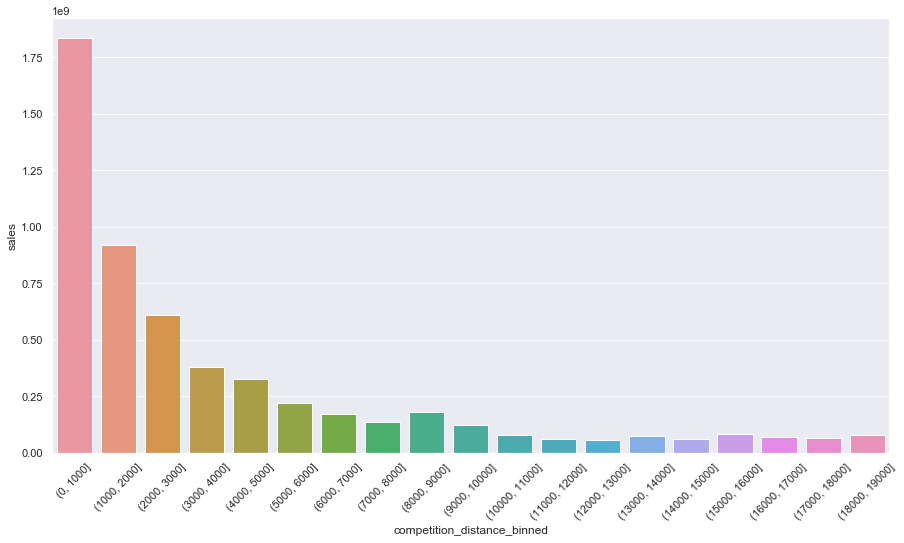

In [99]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

# define os intervalos de distância
bins = np.arange(0, 20_000, 1000)

# 'pd.cut()' é usado para criar intervalos dentro de uma variável numérica. Nesse caso, estamos identificando em
# qual intervalo cada valor da coluna 'competition_distance pertence'.
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)


aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()



ax = sns.barplot(data=aux2, x='competition_distance_binned', y='sales')

ax.tick_params(axis='x', rotation=45)

O senso comum nos faz concluir que quanto mais próximo um competidor estiver de nossa loja menor deveria ser o volume de vendas, afinal, uma parcela dos nossos potenciais clientes usariam os serviços do concorrente. Porém, ao análisarmos o gráfico acima vemos que essa hipótese não é verdade, vemos que o número de vendas é maior nas lojas em que há competidores até 1000m (1km) de distância e vai diminuindo conforme a distância ao competidor mais próximo aumenta.

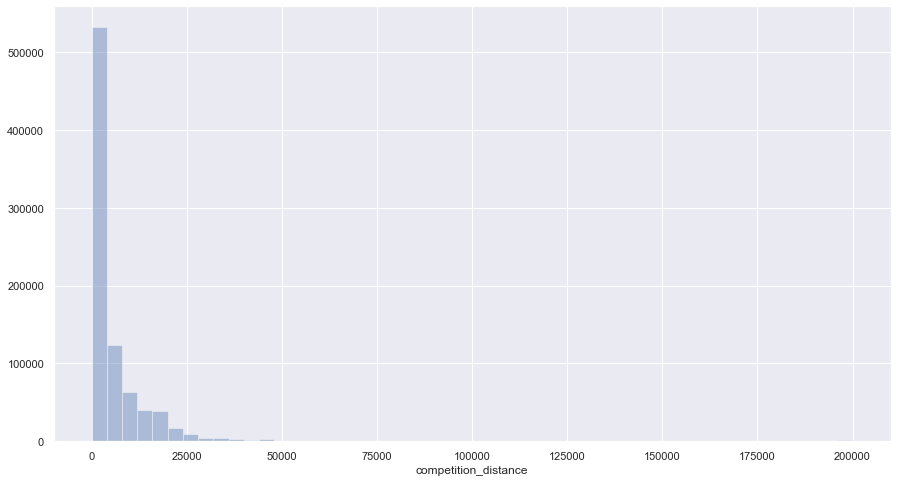

In [100]:
sns.distplot(df4['competition_distance'], kde=False);

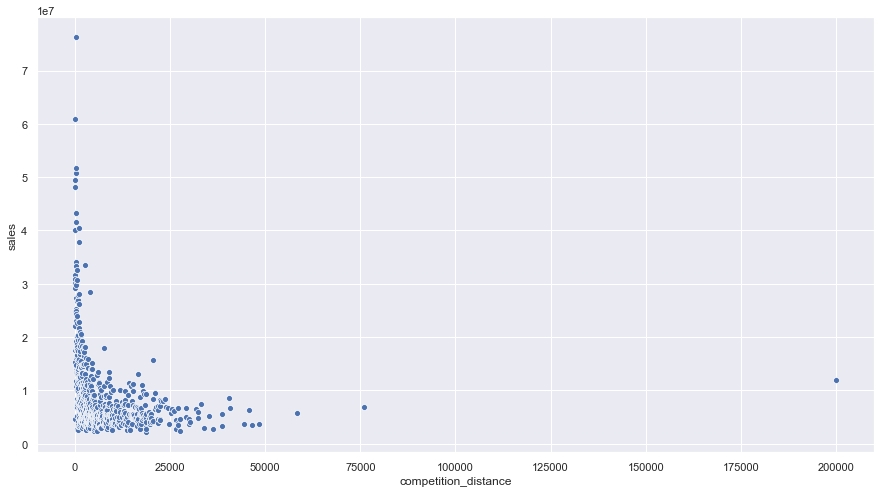

In [101]:
sns.scatterplot(data=aux1, x='competition_distance', y='sales');

Vamos criar um gráfico que mede a correlação entre `competition_distance` e `sales`.

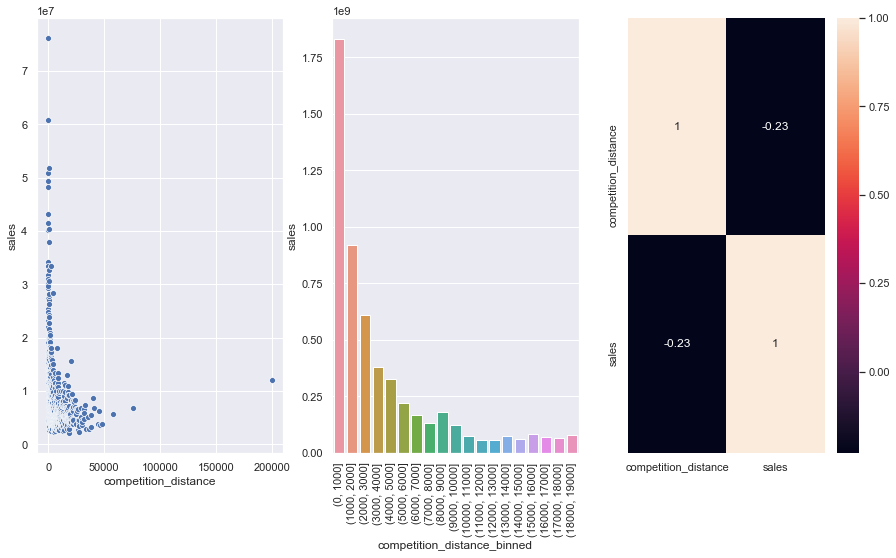

In [102]:
fig, ax = plt.subplots(1, 3)

sns.scatterplot(data=aux1, x='competition_distance',    y='sales', ax=ax[0]);
sns.barplot(data=aux2, x='competition_distance_binned', y='sales', ax=ax[1]).tick_params(axis='x', rotation=90);
sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[2] );

A correlação entre as variavéis `competition_distance` e `sales` é de $-0.23$. Quanta mais próximo de zero, menor é a correlação e quanto mais próximo de 1 ou -1 mais forte é a correlação.

* $Corr(x,y) = 0$  - Não há correlação.
* $Corr(x,y) = 1$  - Forte correlação positiva, as variavéis aumentam/diminuem de valor juntas.
* $Corr(x,y) = -1$ - Forte correlação negativa, as variavéis experimentam variações opostas se uma cresce a outra diminui e vice-versa.


Esse valor negativo nos diz que ao aumentarmos `competition_distance` esperamos que o valor de `sales` diminui, ou seja, quando a distância do competidor mais próximo aumenta existe a tendência do número de vendas diminuir.

### H3. Lojas com competidores a mais tempo deveriam vender mais.

**Falsa** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS.

In [103]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

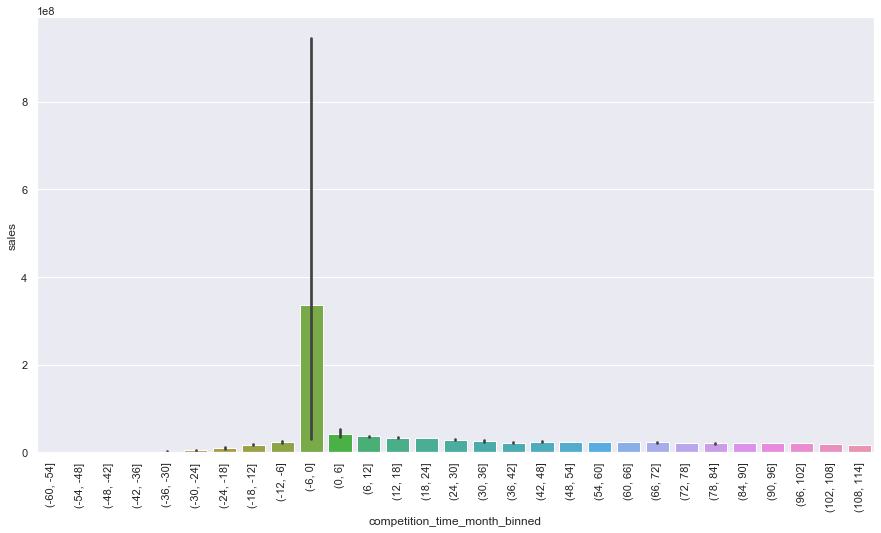

In [104]:
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()

bins = np.arange(-60, 120, 6)

aux1['competition_time_month_binned'] = pd.cut(aux1['competition_time_month'], bins=bins)

ax = sns.barplot(data=aux1, x='competition_time_month_binned', y='sales');

ax.tick_params(axis='x', rotation=90)

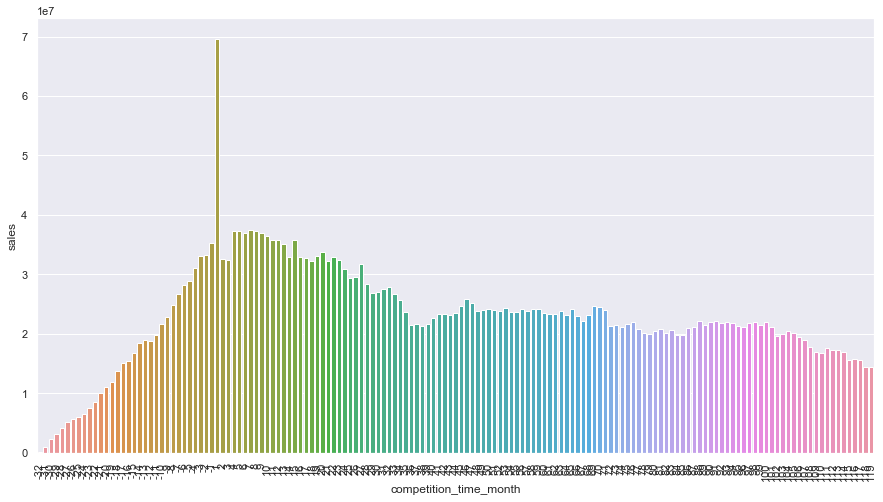

In [105]:
aux2 = aux1[ (aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0) ]

ax = sns.barplot(data=aux2, x='competition_time_month', y='sales');

ax.tick_params(axis='x', rotation=90)

A variável `competition_time_month` nos diz o intervalo de tempo entre a data de abertura do competidor e a data de registro das vendas armazenada em `sales`. Os valores negativos nos diz que o competidor foi aberto depois data de registro de vendas, ou seja, nessa data ainda não havia um competidor próximo à loja.

Pelo gráfico, vemos que o volume de vendas é maior quando `competition_time_month` é um número próximo a zero, ou seja, perto da data de abertura do competidor. Isso significa que quanto mais recente o competidor, maior o volume de vendas da loja, o que contraria o nosso senso comum.

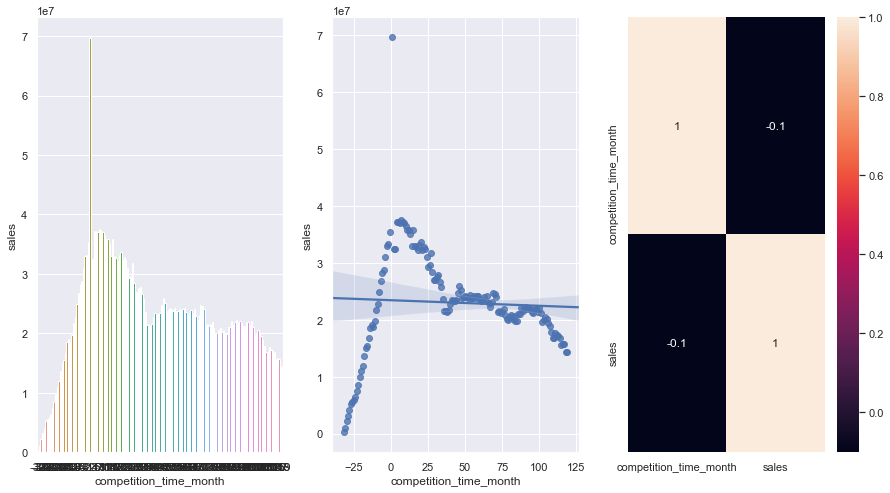

In [106]:
fig, ax = plt.subplots(1, 3)

sns.barplot(data=aux2, x='competition_time_month', y='sales', ax=ax[0]);
sns.regplot(data=aux2, x='competition_time_month', y='sales', ax=ax[1]);

sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[2] );

### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.

**Falsa** Loja com promoções ativas por mais tempo vendem menos, depois de um certo período de promoção.

In [107]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

Esse dataframe possui dados de dois tipos diferentes de promoções, `promo` e `promo2`.

* `promo` - período tradicional de promoção.
* `promo2` - perído de promoção extendida (opcional para cada loja)

A informação da data em que ocorre a mudança entre o período tradicional de promoção e a promoção extendida (inicio da `promo2`) está contida nas colunas: `promo2_since_week` e `promo2_since_year`.

Para calcularmos o tempo que a `promo2` foi ativa, calculamos o intervalo de tempo entre a data que venda ocorreu (`sales`) nessa loja e data que promo2 começou e esse valor foi armazenado em `promo_time_week` (número de meses entre a data de venda e o início da promo2).


* `promo_time_week` < 0 - indica que na data de vendas a promo2 ainda não havia começado (período tradicional de promoção).
* `promo_time_week` > 0 - indica que na data de vendas a promo2 ainda já havia começado (venda realizada no período promocional extendido). 

In [108]:
# a variável promo_time_week nos diz a quanto tempo uma promoção está ativa.  
df4['promo_time_week']

0            0
1          279
2          226
3            0
4            0
          ... 
1016776      0
1016827      0
1016863      6
1017042      0
1017190      0
Name: promo_time_week, Length: 844338, dtype: int64

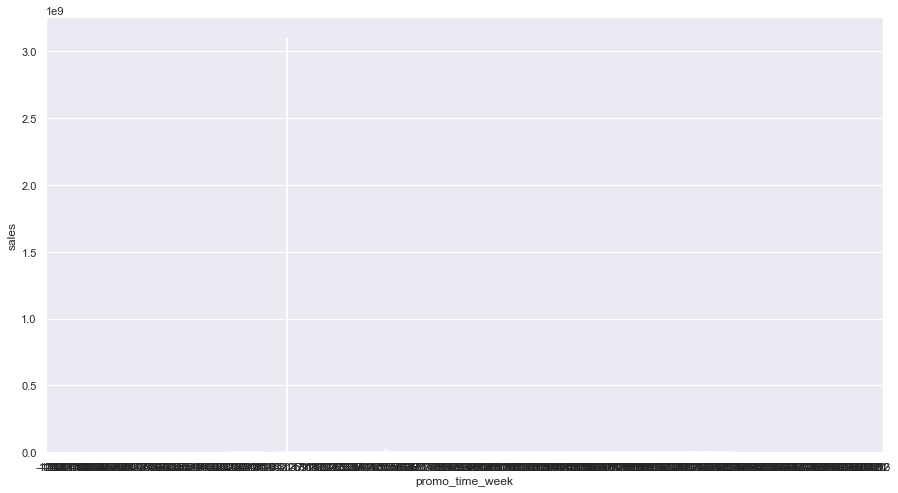

In [109]:
aux1 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

sns.barplot(data=aux1, x='promo_time_week', y='sales');

Não conseguimos visualizar nada nesse gráfico. Para conseguirmos ver melhor vamos subdividir os dados de `promo_time_week` entre valores maiores e menores que zero e plotar separadamente.

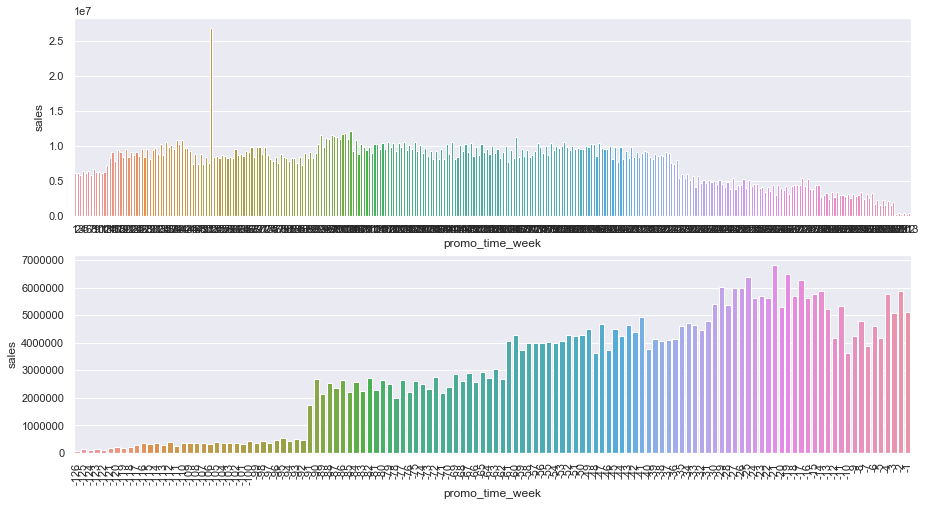

In [110]:
aux2 = aux1[ aux1['promo_time_week'] > 0 ]  # período promo extendido
aux3 = aux1[ aux1['promo_time_week'] < 0 ]  # período promo regular

fig, ax = plt.subplots(2, 1)

sns.barplot(data=aux2, x='promo_time_week', y='sales', ax=ax[0])
sns.barplot(data=aux3, x='promo_time_week', y='sales', ax=ax[1])

plt.xticks(rotation=90);

No gráfico de cima, vemos que após o inicio da promo extendida o gráfico mantém um volume de vendas no mesmo patamar por vários meses, até que chega um ponto que as vendas começam a cair, isso indica que existe um intervalo de tempo em que a promoção é efetiva e após esse período o efeito da promoção já acabou. Não adianta criar uma promoção por muito tempo, pois o seu efeito diminuiu conforme o tempo.

No gráfico de baixo, vemos que no período antecede muito a ativação da promoção extendida, o volume de vendas é pequeno e conforme a ativação da promoção se aproxima as vendas aumentam. Esse comportamente pode ser o efeito do time marketing fazendo propagandas sobre a promoção que se aproxima.

A hipótese: **Lojas com promoções ativas por mais tempo deveriam vender mais** é falsa, porque a promoção só efetiva por um determinado período de tempo antes e após a ativação da promoção, mas conforme o tempo passa, o volume de vendas tende a voltar ao normal.

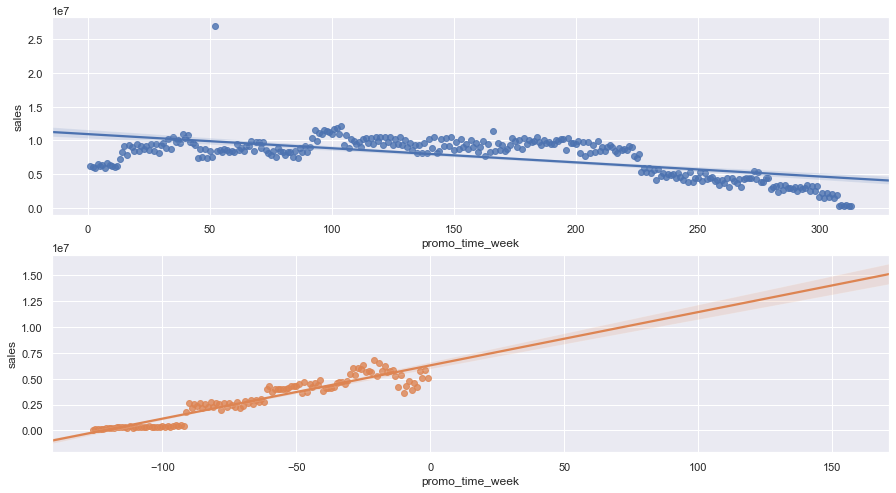

In [111]:
fig, ax = plt.subplots(2, 1)

sns.regplot(data=aux2, x='promo_time_week', y='sales', ax=ax[0]);
sns.regplot(data=aux3, x='promo_time_week', y='sales', ax=ax[1]);

No período após a ativação temos uma tendência de queda (gráfico de cima) e no período pré-promoção temos uma tendência de alta.

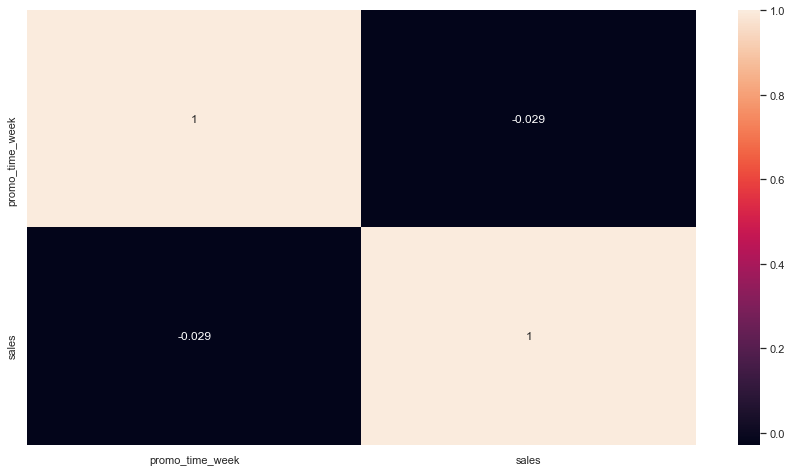

In [112]:
sns.heatmap( aux1.corr(method='pearson'), annot=True )

Devida a correlação fraca com a variável resposta é provavel que a feature `promo_time_week` não seja utilizada para treinar o modelo de Machine Learning.

### <s>H5. Lojas com mais dias de promoção deveriam vender mais.<\s>

Vamos deixar essa hipótese 'on hold', se necessário validaremos ela no segundo ciclo do CRISP-DS.

### H6. Lojas com mais promoções consecutivas deveriam vender mais.

**Falsa** Lojas com mais promoções consecutivas vendem menos.

In [113]:
( df4[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2'])
                                   .sum()
                                   .sort_values('sales', ascending=True)
                                   .reset_index() 
)

,promo,promo2,sales
0,0,1,1289362241
1,1,1,1472275754
2,0,0,1482612096
3,1,0,1628930532


O menor volume de vendas foi obtido quando a loja participou só do promo2, as lojas que participaram das duas promoções foram as segunda que venderam menos, as que não participaram de nenhum promoção foram a segunda que mais venderam e as que só participaram da primeira promoção foram as que mais venderam.

Vemos que as lojas que participaram da promo2 foram as que tiveram pior performance, ou seja, as lojas que tiveram promoções consecutivas não necessariamente venderam mais.

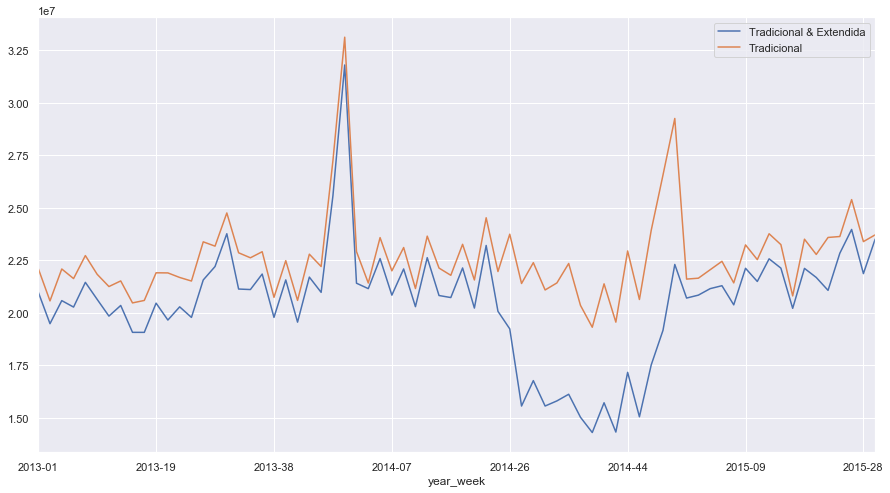

In [114]:
aux1 = df4.query('(promo == 1) & (promo2 == 1)')[['year_week', 'sales']].groupby('year_week').sum()
aux2 = df4.query('(promo == 1) & (promo2 == 0)')[['year_week', 'sales']].groupby('year_week').sum()

ax = aux1.plot();

aux2.plot(ax=ax)

ax.legend( labels=['Tradicional & Extendida', 'Tradicional'] );

O comportamento nas duas situações são bem semelhantes, no entanto o volume da promoção no caso em que as lojas participaram da promoção tradicional e da promoção extendida é sempre menor do que aquelas que só participaram da promoção tradicional.

Podemos concluir que hipótese é falsa. Em relação a relevância no modelo, a promoção ser ou não extendida não aparenta trazer uma variabilidade grande o suficiente ao modelo para que ela seja considerada importante.

### H7. Lojas abertas durante o feriado de Natal deveriam vender mais.

**Falsa** Lojas abertas durante o feriado de natal vendem menos.

In [115]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

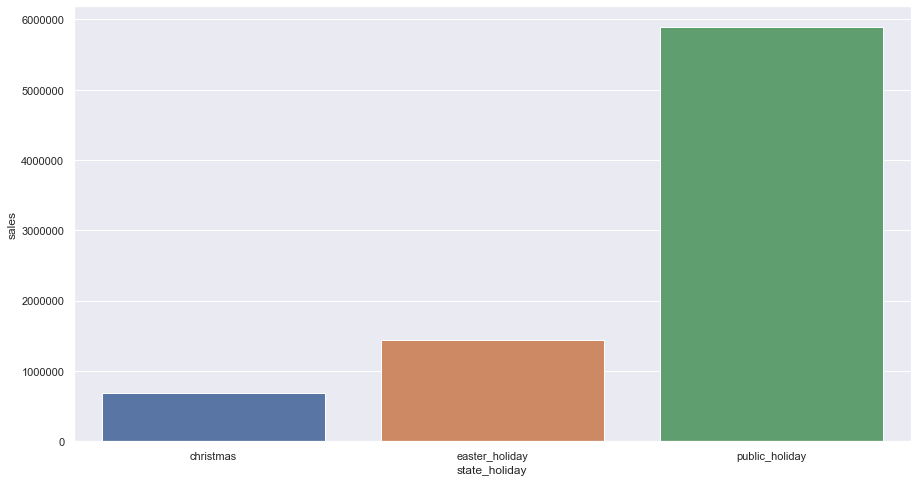

In [116]:
aux1 = ( df4.query('state_holiday != "regular_day"')[['state_holiday', 'sales']]
        .groupby('state_holiday')
        .sum()
        .reset_index() 
       )

sns.barplot(data=aux1, x='state_holiday', y='sales');

Visivelmente no natal o volume de vendas é menor que na páscoa e feríados públicos.

Vamos verificar se isso sempre aconteceu ou se houve uma mudança de têndencia ao longo do tempo.

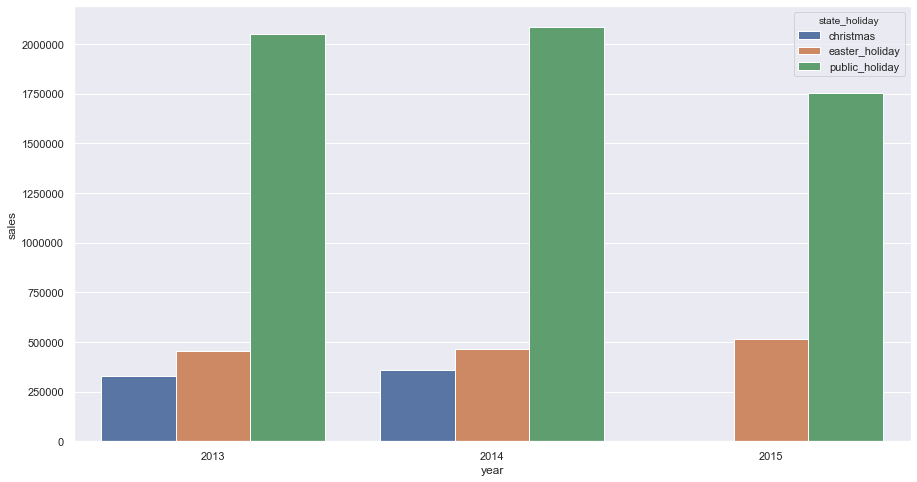

In [117]:
aux2 = ( df4.query('state_holiday != "regular_day"')[['year', 'state_holiday', 'sales']]
        .groupby(['year', 'state_holiday'])
        .sum()
        .reset_index()
       )

sns.barplot(data=aux2, x='year', y='sales', hue='state_holiday');

As vendas de Natal foram menores nos anos de 2013 e 2014. No ano de 2015 não temos dados, pois a data mais recente do dataframe é de antes do natal.

### H8. Lojas deveriam vender mais ao longo dos anos.

**Falsa** Lojas vendem menos ao longo do ano.

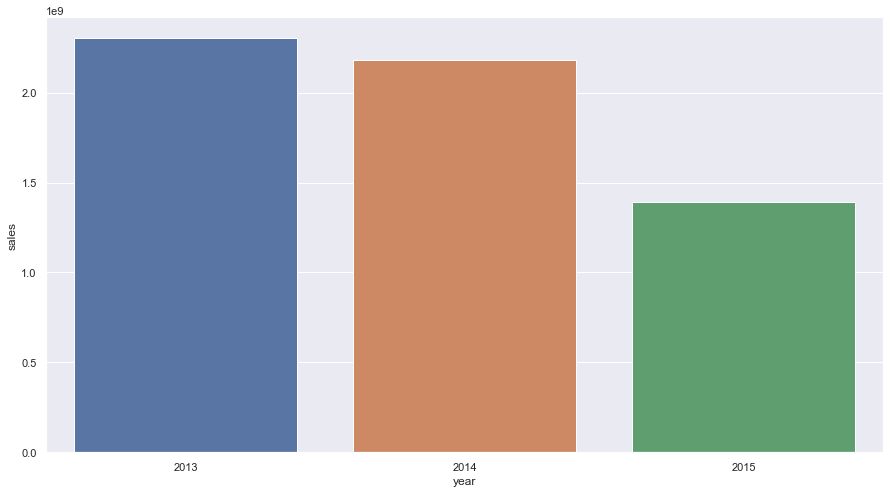

In [118]:
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()

sns.barplot(data=aux1, x='year', y='sales');

As vendas vem caindo ao longo dos anos.

Vamos calcular a tendência e a correlação.

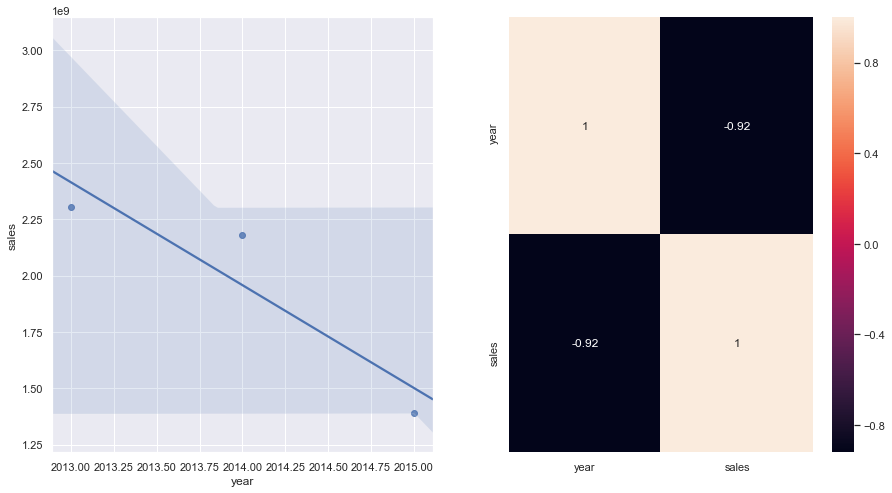

In [119]:
fig, ax = plt.subplots(1, 2)

sns.regplot(data=aux1, x='year', y='sales', ax=ax[0]);

sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[1] );

Temos uma correlação negativa muito forte entre `year` e `sales`, no entanto essa correlação de queda pode estar distorcida, pois como só temos dados até pouco mais da metade do ano de 2015, a queda de vendas representada no gráfico é muito mais acentuada do que seria na prática, caso tivessemos os dados até o final do ano.

**Na vida real sempre pegamos períodos fechados para fazermos análises**

### H9. Lojas deveriam vender mais no segundo semestre do ano.

**Falsa** Lojas vendem menos no segundo semestre do ano.

In [120]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

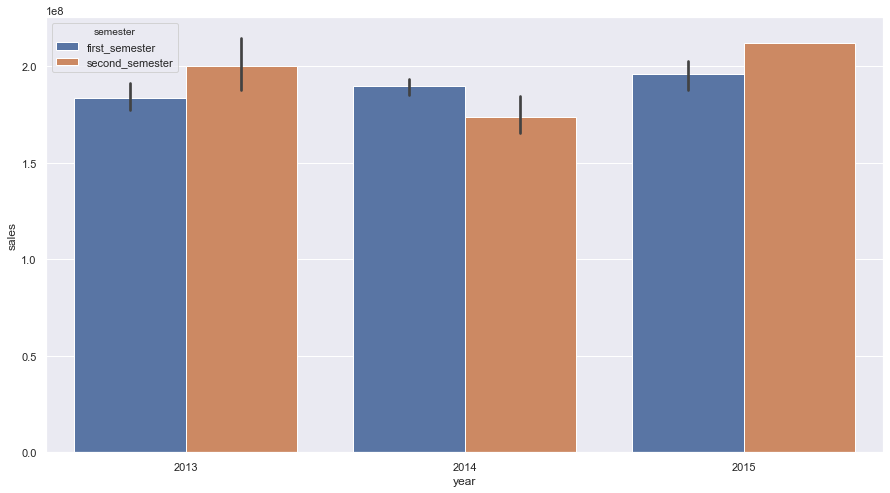

In [121]:
aux1 = ( df4[['year', 'month', 'sales']]
        .groupby(['year', 'month'])
        .sum()
        .reset_index() 
       )

aux1['semester'] = aux1['month'].apply(lambda x: 'first_semester' if x <= 6 else 'second_semester')

sns.barplot(data=aux1, x='year', y='sales', hue='semester');

In [122]:
aux1.tail()

,year,month,sales,semester
26,2015,3,205631683,first_semester
27,2015,4,197918886,first_semester
28,2015,5,189143897,first_semester
29,2015,6,207363373,first_semester
30,2015,7,212322616,second_semester


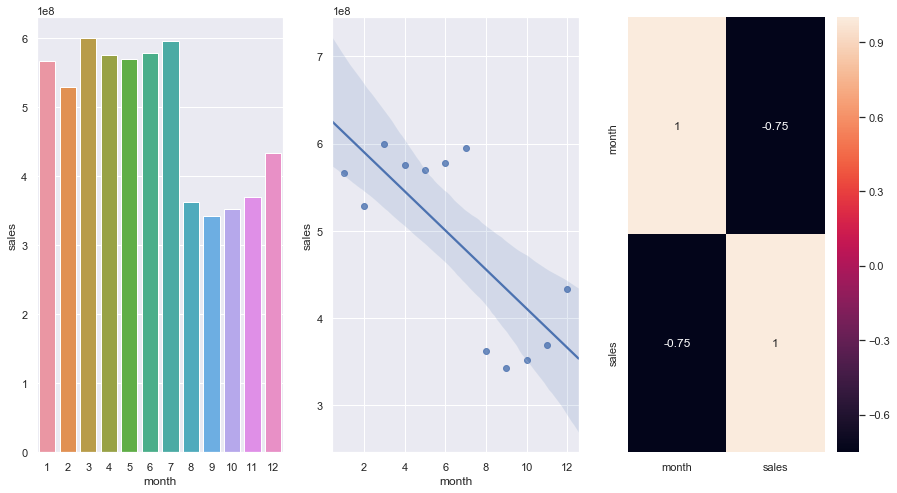

In [123]:
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()


fig, ax = plt.subplots(1, 3)

sns.barplot(data=aux1, x='month', y='sales', ax=ax[0]);

sns.regplot(data=aux1, x='month', y='sales', ax=ax[1]);

sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[2] );

As lojas da Rossmann vendem menos no segundo semestre.

### H10. Lojas deveriam vender mais depois do dia 10 de cada mês.

**Verdadeira** Lojas vendem mais depois do dia 10 de cada mês.

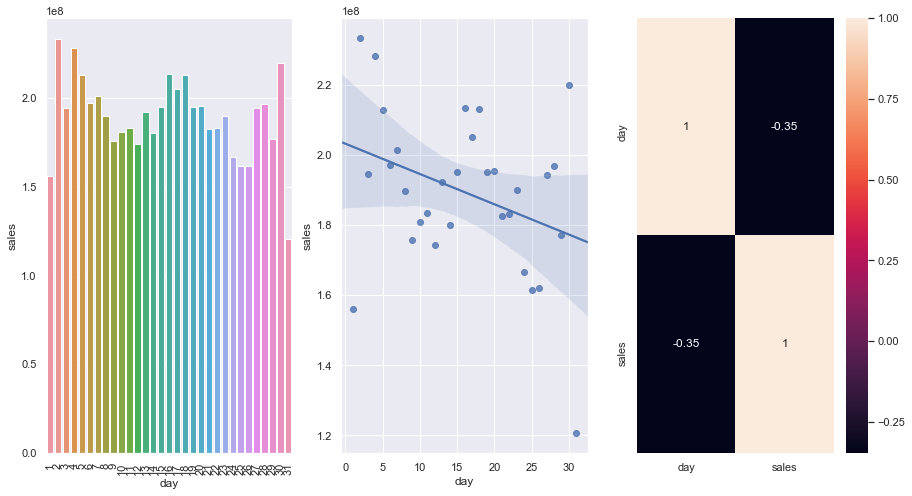

In [124]:
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()

fig, ax = plt.subplots(1, 3)

sns.barplot(data=aux1, x='day', y='sales', ax=ax[0]).tick_params(axis='x', rotation=90);

sns.regplot(data=aux1, x='day', y='sales', ax=ax[1]);

sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[2] );

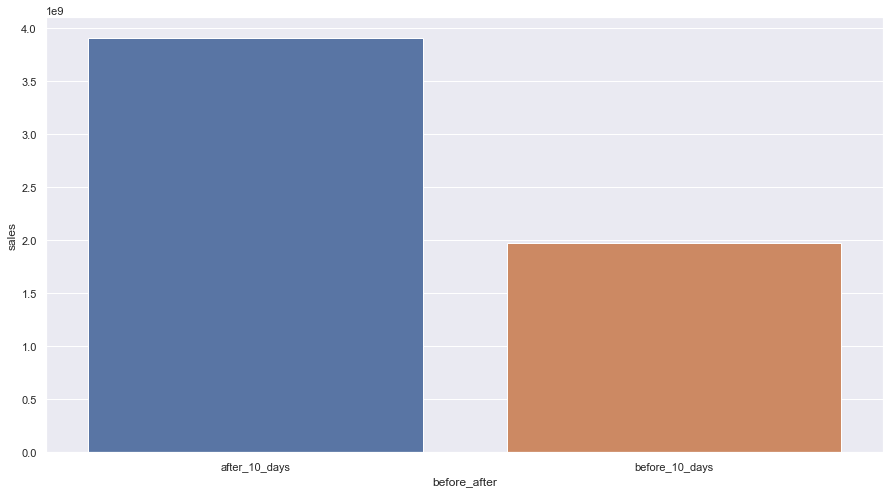

In [125]:
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')

aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()

sns.barplot(data=aux2, x='before_after', y='sales');

### H11. Lojas deveriam vender menos aos finais de semana.

**Verdadeira** Lojas vendem menos no final de semana

In [126]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

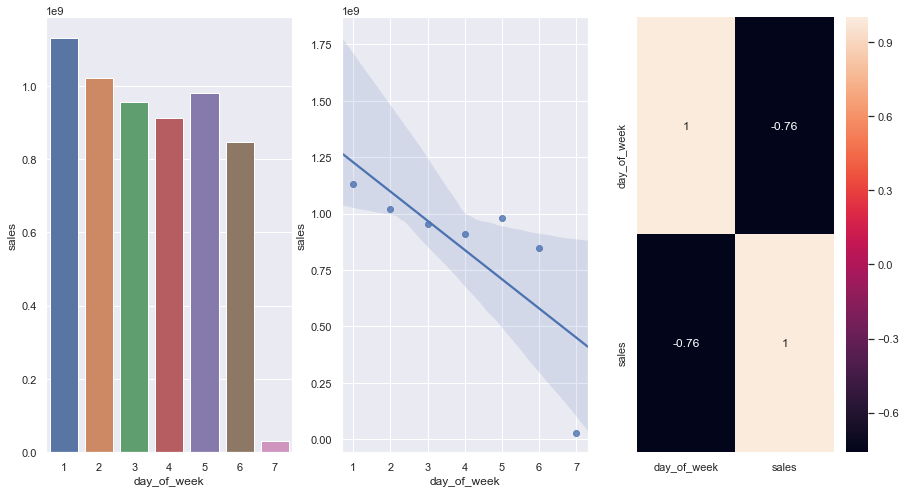

In [127]:
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()


fig, ax = plt.subplots(1, 3)

sns.barplot(data=aux1, x='day_of_week', y='sales', ax=ax[0]);

sns.regplot(data=aux1, x='day_of_week', y='sales', ax=ax[1]);

sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[2] );

* 1 - Segunda-feira
* 2 - Terça-feira
* 3 - Quarta-feira
* 4 - Quinta-feira
* 5 - Sexta-feira
* 6 - Sábado
* 7 - Domingo

### H12. Lojas deveriam vender menos durante os feriados escolares.

**Verdadeiro** Lojas vendem menos durante os feriados escolares (exceto nos meses de Julho e Agosto)

In [128]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

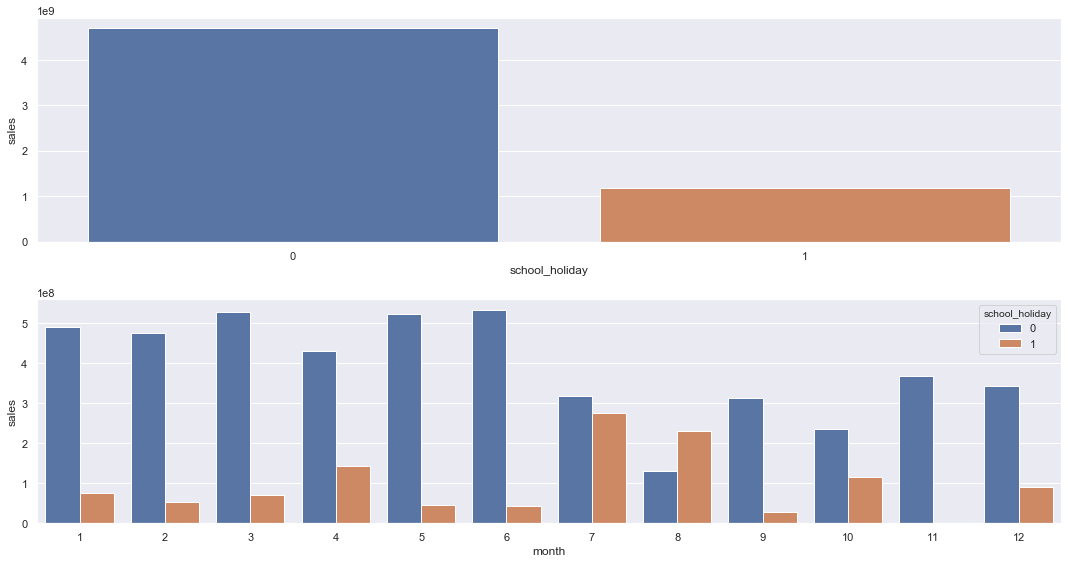

In [129]:
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

aux2 = df4[['month', 'school_holiday', 'sales']].groupby(['month', 'school_holiday']).sum().reset_index()


fig, ax = plt.subplots(2, 1)

sns.barplot(data=aux1, x='school_holiday', y='sales', ax=ax[0]);

sns.barplot(data=aux2, x='month', y='sales', hue='school_holiday', ax=ax[1]);

fig.tight_layout()

### 4.2.1 Resumo da Hipoteses

In [130]:
from tabulate import tabulate

In [131]:
tab = [['Hipoteses', 'Conclusao', 'Relevancia'],
       ['H1', 'Falsa', 'Baixa'],
       ['H2', 'Falsa', 'Media'],
       ['H3', 'Falsa', 'Media'],
       ['H4', 'Falsa', 'Baixa'],
       ['H5', '-',      '-'],
       ['H6', 'Falsa', 'Baixa'],
       ['H7', 'Falsa', 'Media'],
       ['H8', 'Falsa', 'Alta'],
       ['H9', 'Falsa', 'Alta'],
       ['H10', 'Verdadeira', 'Alta'],
       ['H11', 'Verdadeira', 'Alta'],
       ['H12', 'Verdadeira', 'Baixa'],
      ]

print(tabulate(tab, headers='firstrow'))

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


## 4.3 Análise Multivariada

Pearson é um método estatístico para calcular a correlação entre duas variáveis númericas. Quando temos duas variáveis categóricas ou uma númerica e outra categorica não podemos usar o método de Pearson. Nessa situação, utilizamos o método Cramer-V.

### 4.3.1 Numerical Attributes

In [132]:
num_attributes.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


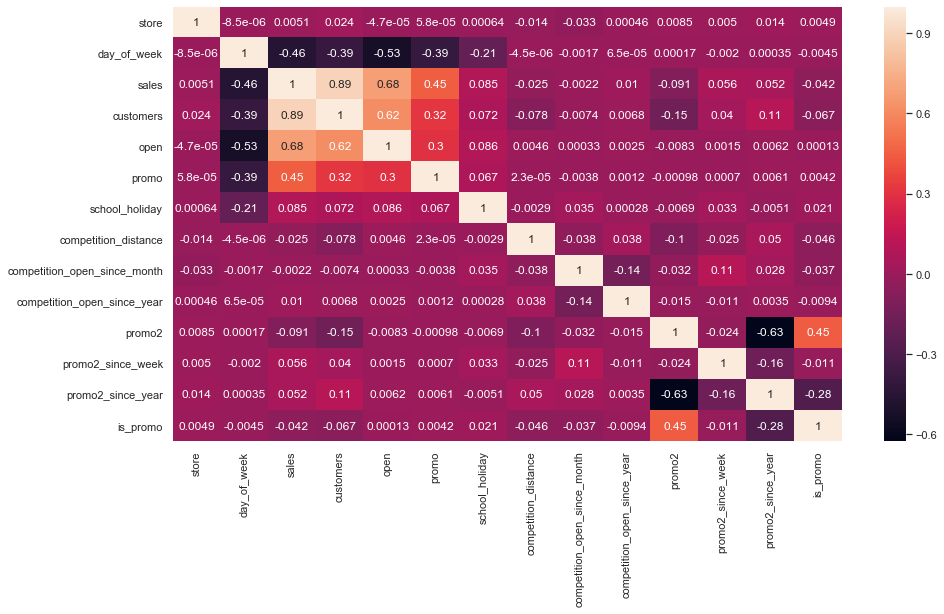

In [133]:
correlation = num_attributes.corr(method='pearson')

sns.heatmap(correlation, annot=True);

### 4.3.2 Categorial Attributes

In [134]:
cat_attributes = df4.select_dtypes(include='object')

In [135]:
cat_attributes.head()

,state_holiday,store_type,assortment,year_week
0,regular_day,c,basic,2015-30
1,regular_day,a,basic,2015-30
2,regular_day,a,basic,2015-30
3,regular_day,c,extended,2015-30
4,regular_day,a,basic,2015-30


O método de Cramer-V é calculado através da seguinte fórmula:

${\displaystyle V={\sqrt {\frac {\varphi ^{2}}{\min(k-1,r-1)}}}={\sqrt {\frac {\frac{\chi^{2}}{n}}{\min(k-1,r-1)}}}\;,}$

Onde:

* $\varphi$ is the phi coefficient.
* $\chi ^{2}$ is derived from Pearson's chi-squared test
* $n$ is the grand total of observations
* $k$ being the number of columns.
* $r$ being the number of rows.

In [136]:
from scipy import stats

In [137]:
# tabela de contigência ou matriz de confusão, ela faz todas as possíveis combinações de valores das variáveis
# categóricas e conta quantos registros cada combinação possui.
cm = pd.crosstab(cat_attributes['state_holiday'], cat_attributes['store_type'])

cm

store_type,a,b,c,d
state_holiday,,,,
christmas,4,66,0,1
easter_holiday,36,100,0,9
public_holiday,236,285,65,108
regular_day,456766,15109,112903,258650


In [138]:
# no exemplo acima existiam 4 registros com feríado de natal e loja do tipo a
cat_attributes.query('state_holiday == "christmas" and store_type == "a"')

,state_holiday,store_type,assortment,year_week
241499,christmas,a,extended,2014-51
241977,christmas,a,extended,2014-51
616339,christmas,a,extended,2013-51
616908,christmas,a,extended,2013-51


In [139]:
# para efetuarmos os cálculos precisamos que 'cm' tenha a formula de uma matriz (2d-array)
cm = cm.values

cm

array([[     4,     66,      0,      1],
       [    36,    100,      0,      9],
       [   236,    285,     65,    108],
       [456766,  15109, 112903, 258650]])

In [140]:
# a função 'chi2_contingency()' recebe como uma parâmetro uma tabela de contingência (confusion matrix) e nos
# retorna uma tupla com 4 valores: teste de pearson, p-valor, número de graus de liberdade e uma tabela de 
# frequências.

# como estamos interessados apenas no chi-squared, vamos pegar o primeiro valor
chi2 = stats.chi2_contingency( cm )[0]
    
# soma de todos os valores da matriz de contigencia
n = cm.sum()

# número de linhas e colunas
r, k = cm.shape

In [141]:
v = np.sqrt( (chi2/n) / min(k-1, r-1) )

v

0.07106457093267678

In [142]:
print(f'A correlação de crammer entre as variáveis "state_holiday" e "store_type" foi de: \n{v}')

A correlação de crammer entre as variáveis "state_holiday" e "store_type" foi de: 
0.07106457093267678


O valor do V de Cramer varia no intervalo de 0 a 1. Portanto em variáveis categóricas não existe correlação negativa, ou temos correlação ($V \approx 1$) ou não temos correlação ($V \approx 0$).

Para calcularmos o valor da correlação de cramer para todos os pares de variáveis categoricas vamos criar uma função. Mas antes de definirmos tal função devemos nos atentar ao fato de que o V de Cramer pode ser uma estimador altamente enviesado e tenderá a superestimar a força da correlação.

Para corrigir possíveis efeito devemos utilizar um corretor de viés:

${\displaystyle {\tilde {V}}={\sqrt {\frac {{\tilde {\varphi }}^{2}}{\min({\tilde {k}}-1,{\tilde {r}}-1)}}}}$

Onde:

* ${\displaystyle {\tilde {\varphi }}^{2}=\max \left(0,\varphi ^{2}-{\frac {(k-1)(r-1)}{n-1}}\right)}$


* ${\displaystyle {\tilde {k}}=k-{\frac {(k-1)^{2}}{n-1}}}$


* ${\displaystyle {\tilde {r}}=r-{\frac {(r-1)^{2}}{n-1}}}$

In [143]:
def crammer_v(x, y):
    cm = pd.crosstab(x, y).values
    
    chi2 = stats.chi2_contingency(cm)[0]
    n = cm.sum()
    r, k = cm.shape
    
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    rcorr = r - (r-1)**2 / (n-1)
    kcorr = k - (k-1)**2 / (n-1)
    
    return np.sqrt( (chi2corr/n) / min(rcorr-1, kcorr-1) )

In [144]:
crammer_v(cat_attributes['state_holiday'], cat_attributes['store_type'])

0.07106469715258833

Vamos agora montar um dataframe com o valores das correlações de Crammer. 

In [145]:
from itertools import product

In [146]:
selected_cols = ['state_holiday', 'store_type', 'assortment']
cols_permutation = list(product(selected_cols, repeat=2))

cols_permutation

[('state_holiday', 'state_holiday'),
 ('state_holiday', 'store_type'),
 ('state_holiday', 'assortment'),
 ('store_type', 'state_holiday'),
 ('store_type', 'store_type'),
 ('store_type', 'assortment'),
 ('assortment', 'state_holiday'),
 ('assortment', 'store_type'),
 ('assortment', 'assortment')]

In [147]:
v_values = [ crammer_v( cat_attributes[col1], cat_attributes[col2] ) for col1, col2 in cols_permutation ]

data = np.array(v_values).reshape(3, 3)


cramer_correlation = pd.DataFrame(data, columns=selected_cols, index=selected_cols)
cramer_correlation

,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


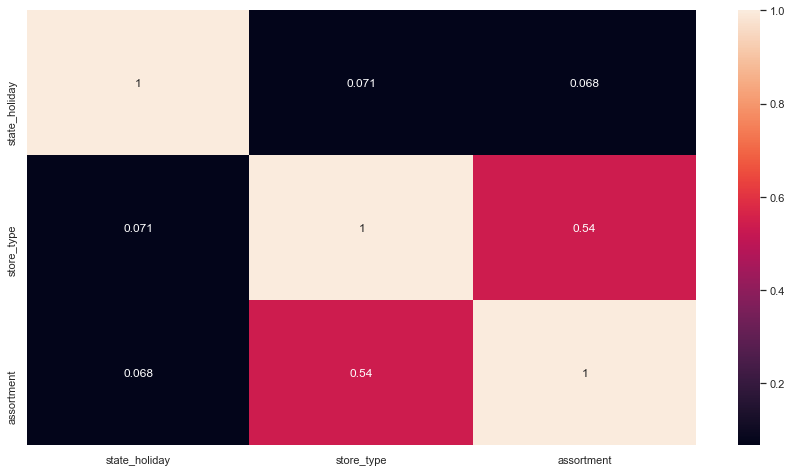

In [148]:
sns.heatmap(cramer_correlation, annot=True);

# 5.0 Data Preparation

In [63]:
df5 = df4.copy()

## 5.1 Normalização

Como nenhuma variável do projeto segue uma distribuição normal, não utilizaremos esse tipo de preparação no projeto.

## 5.2 Rescaling

Primeiramente, precisamos definir em quais variáveis iremos aplicar o rescaling. Para tal, vamos separar as variáveis númericos do nosso dataset.

In [64]:
a = df5.select_dtypes( include=['int64', 'float64'] )

In [65]:
a.head()

,store,day_of_week,sales,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,competition_time_month,promo_time_week
0,1,5,5263,1,1,1270.0,9,2008,0,31,2015,0,2015,7,31,31,84,0
1,2,5,6064,1,1,570.0,11,2007,1,13,2010,1,2015,7,31,31,94,279
2,3,5,8314,1,1,14130.0,12,2006,1,14,2011,1,2015,7,31,31,105,226
3,4,5,13995,1,1,620.0,9,2009,0,31,2015,0,2015,7,31,31,71,0
4,5,5,4822,1,1,29910.0,4,2015,0,31,2015,0,2015,7,31,31,4,0


Vamos aplicar o rescaling nas seguintes variáveis:

* day_of_week
* competition_distance
* year
* month
* day
* week_of_year
* competition_time_month
* promo_time_week

Das variáveis que listamos acima, vamos separar aquelas que possuem **natureza cíclica**:

* **day_of_week**
* competition_distance
* year
* **month**
* **day**
* **week_of_year**
* competition_time_month
* promo_time_week


As variáveis marcadas em negrito serão transformada posteriormente.

Com as variáveis restantes, precisamos decidir se aplicaremos `MinMaxScaler()` ou `RobustScaler()`.

Essa decisão será tomada segundo o seguinte critério.

* variável **não** possui outliers $\;\; \Rightarrow \;\;$ `MinMaxScaler()`
* variável possui outliers $\;\; \Rightarrow \;\;$ `RobustScaler()`

Para descobrirmos as variáveis que possuem outliers, vamos simplesmente traçar o seu boxplot.

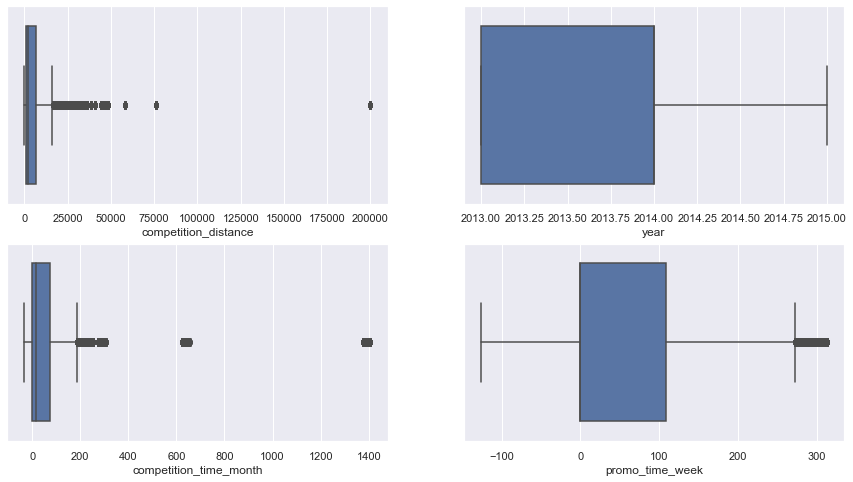

In [152]:
fig, axes = plt.subplots(2, 2)

sns.boxplot( a['competition_distance'],   ax=axes[0,0] )
sns.boxplot( a['year'],                   ax=axes[0,1] )
sns.boxplot( a['competition_time_month'], ax=axes[1,0] )
sns.boxplot( a['promo_time_week'],        ax=axes[1,1] );

Pelo gráfico vemos que as variaveis `competition_distance` e `competition_time_month` possuem um número elevado de outliers (ponto fora do range definida pelas barras verticas do boxplot - **whiskers**) distante dos whiskers, os quais são calculados usando a fórmula:

$W_{\;lower} = Q_1 - 1.5 IQR$

$W_{\;upper} = Q_3 + 1.5 IQR$


A variável `promo_time_week` apesar de possuir alguns valores fora do intervalo entre $\left[ W_{\;lower}, W_{\;upper} \right]$, eles estão próximos o suficiente para tomarmos o risco e utilizar o `MinMaxScaler()`.

Já a variável `year`, não possui nenhum outlier.

Portanto faremos os seguintes rescales:

* **RobustScaler()**
    * competition_distance
    * competition_time_month


* **MinMaxScaler()**
    * promo_time_week
    * year

In [66]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [67]:
rs = RobustScaler()
mms = MinMaxScaler()


# RobustScaler()

# competition_distance
df5['competition_distance'] = rs.fit_transform( df5[['competition_distance']].values )

# competition_time_month
df5['competition_time_month'] = rs.fit_transform( df5[['competition_time_month']].values )



# MinMaxScaler()

# promo_time_week
df5['promo_time_week'] = mms.fit_transform( df5[['promo_time_week']].values )

# year
df5['year'] = mms.fit_transform( df5[['year']].values )

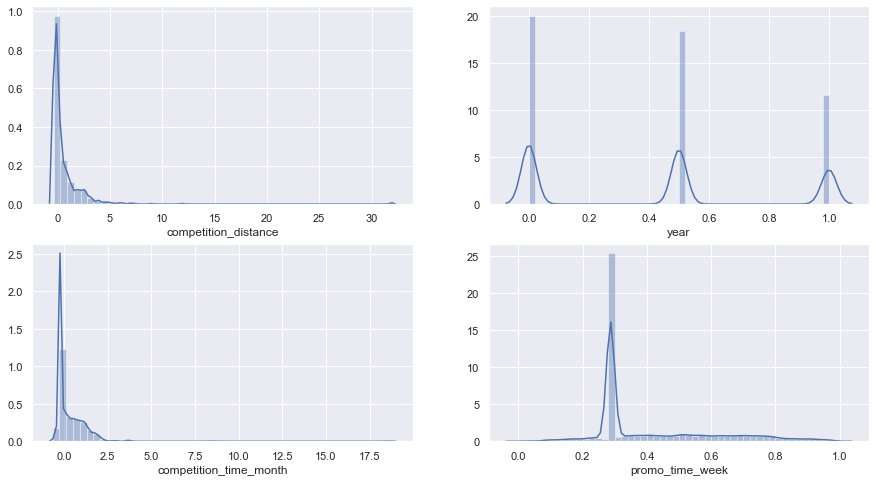

In [155]:
fig, axes = plt.subplots(2, 2)

sns.distplot( df5['competition_distance'],   ax=axes[0,0] )
sns.distplot( df5['year'],                   ax=axes[0,1] )
sns.distplot( df5['competition_time_month'], ax=axes[1,0] )
sns.distplot( df5['promo_time_week'],        ax=axes[1,1] );

## 5.3 Transformação

### 5.3.1 Encoding

In [68]:
df5.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,-0.170968,...,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,-0.283871,...,1,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,1.903226,...,1,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,-0.275806,...,0,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,4.448387,...,0,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016


O observando o dataset acima, identificamos 3 variáveis categóricas:

* state_holiday
* store_type
* assortment

**state_holiday**

A função `pd.get_dummies()` retorna o dataframe passado com a adição das colunas geradas pelo OneHotEncoding, no
caso abaixo, estão sendo adicionadas 4 colunas com nome dados por `prefix` + valores da coluna passada em `columns`.

Por exemplo, *state_holiday + christmas* $\rightarrow$ *state_holiday_christmas*.

In [69]:
# state_holiday - OneHotEncoding

# essa variável encapsula uma noção de 'estado' - dias regulares e feriados - os quais representam momentos
# em que o comportamento (da variável resposta) muda. Por exemplo, espera-se que o volume de venda no natal
# seja maior que nos dias regulares. Indicaremos esse comportamento para o modelo através do OneHotEncoding.

df5 = pd.get_dummies( df5, prefix=['state_holiday'], columns=['state_holiday'] )

In [70]:
df5.loc[:, df5.columns.str.startswith('state')].sample(5)

,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
131822,0,0,0,1
942155,0,0,0,1
415615,0,0,0,1
415014,0,0,0,1
578023,0,0,0,1


**store_type**

In [71]:
df5['store_type'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
# store_type - LabelEncoding

# a variável store_type armazena valores como 'a', 'b', 'c' e 'd'. Nesse situação não há uma relação de ordem
# entre as variáveis baseada simplesmente no seu label, portanto utilizaremos o LabelEncoding para ela.

le = LabelEncoder()

df5['store_type'] = le.fit_transform( df5['store_type'] )

In [74]:
df5['store_type'].unique()

array([2, 0, 3, 1])

Após aplicarmos o método `fit_transform()` do objeto `LabelEnconder` na coluna `store_type`, mapeamos os labels originais nos seguinte números:

* 'a' - 0
* 'b' - 1
* 'c' - 2
* 'd' - 3

**assortment**

In [75]:
df5['assortment'].unique()

array(['basic', 'extended', 'extra'], dtype=object)

Ao observamos os valores da variável categórica `assortment`, podemos notar que existe uma noção de ordem entre as diferentes classes, por exemplo, poderíamos ordenar:

* basic < extra < extended

Portanto utilizaremos o OrdinalEncoding

In [76]:
# assortment - OrdinalEncoding

assortment_dict = {'basic': 1, 'extra': 2, 'extended': 3}

df5['assortment'] = df5['assortment'].map( assortment_dict )

In [77]:
df5['assortment'].unique()

array([1, 3, 2])

Com essa transformação mapeamos os labels originais para:

* basic - 1
* extra - 2
* extended - 3

### 5.3.2 Response Variable Transformation

**Antes**

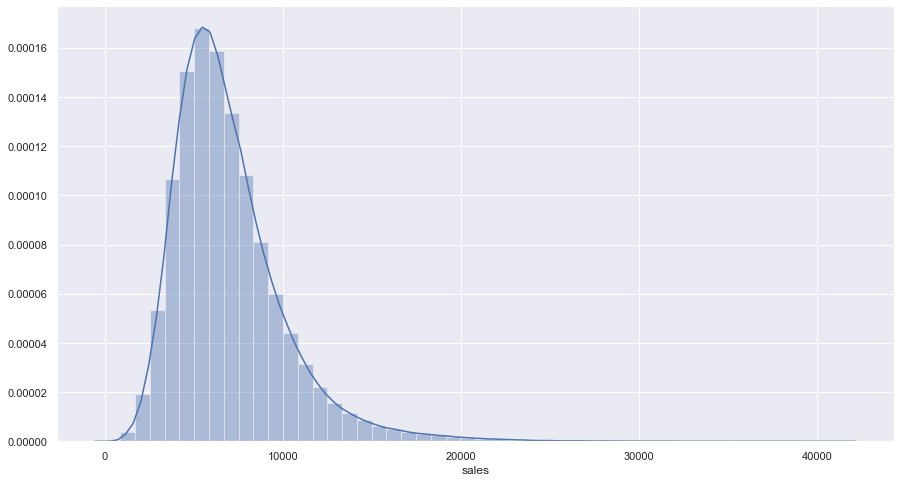

In [166]:
sns.distplot( df5['sales'] );

Vamos inicialmente aplicar a transformação logaritmica, através da função `np.log1p()` da biblioteca Numpy.

In [78]:
df5['sales'] = np.log1p( df5['sales'] )

**Depois**

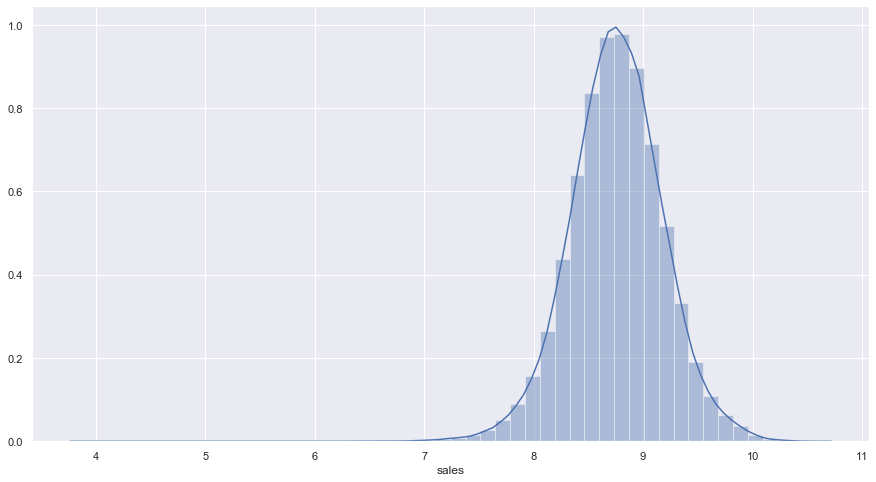

In [168]:
sns.distplot( df5['sales'] );

### 5.3.2 Nature Transformation

Na seção **5.2 Rescaling** discutimos que as seguintes variáveis possuem natureza ciclica:

* day_of_week
* month
* day
* week_of_year


Em transformações cíclicas encodamos as variáveis representando-as como pontos no ciclo trigonométrico, onde o circulo é divido em $n$ partes, em que cada uma representa um valor dentro de cada ciclo.

Por exemplo, a variável `month` assume número de $1$ a $12$, portanto dividimos o ciclo em $n = 12$ pedaços, em que cada seção pode ser representado por um par de seno e cosseno, definido pelo ângulo $\theta_k = k \left( \frac{360º}{12} \right)$ (graus) ou $\theta_k = k \left( \frac{2\pi}{12} \right)$ (rad), onde cada valor de $k$ representa um dos meses. 

In [79]:
# month
df5['month_sin'] = df5['month'].apply( lambda x: np.sin( x * (np.pi/12) ) )
df5['month_cos'] = df5['month'].apply( lambda x: np.cos( x * (np.pi/12) ) )

In [170]:
df5.filter(regex='^month').sample(5)

,month,month_sin,month_cos
665784,11,2.588190e-01,-9.659258e-01
615407,12,1.224647e-16,-1.000000e+00
458548,5,9.659258e-01,2.588190e-01
829940,6,1.000000e+00,6.123234e-17
195221,2,5.000000e-01,8.660254e-01


Vamos agora repetir o mesmo processo para as outras variáveis.

In [80]:
# day_of_week
df5['day_of_week_sin'] = df5['day_of_week'].apply( lambda x: np.sin( x * (np.pi/7) ) )
df5['day_of_week_cos'] = df5['day_of_week'].apply( lambda x: np.cos( x * (np.pi/7) ) )


# day
df5['day_sin'] = df5['day'].apply( lambda x: np.sin( x * (np.pi/30) ) )
df5['day_cos'] = df5['day'].apply( lambda x: np.cos( x * (np.pi/30) ) )


# week_of_year
df5['week_of_year_sin'] = df5['week_of_year'].apply( lambda x: np.sin( x * (np.pi/52) ) )
df5['week_of_year_cos'] = df5['week_of_year'].apply( lambda x: np.cos( x * (np.pi/52) ) )


In [172]:
df5.filter(regex='(sin$|cos$)').sample(5)

,month_sin,month_cos,day_of_week_sin,day_of_week_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
774265,0.866025,-0.500000,0.781831,0.623490,0.587785,0.809017,0.935016,-0.354605
506867,0.866025,0.500000,0.974928,-0.222521,0.309017,0.951057,0.748511,0.663123
372627,0.866025,-0.500000,0.781831,-0.623490,0.743145,0.669131,0.935016,-0.354605
387299,0.965926,-0.258819,0.974928,0.222521,0.669131,-0.743145,0.970942,-0.239316
345980,0.707107,-0.707107,0.781831,-0.623490,0.500000,0.866025,0.822984,-0.568065


# 6.0 Feature Selection

In [81]:
df6 = df5.copy()

## 6.1 Split Dataframe into Training and Test Dataset

In [82]:
df6.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,state_holiday_public_holiday,state_holiday_regular_day,month_sin,month_cos,day_of_week_sin,day_of_week_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,5,2015-07-31,8.568646,1,1,2,1,-0.170968,9,...,0,1,0.965926,-0.258819,0.781831,-0.62349,-0.104528,-0.994522,0.954721,-0.297503
1,2,5,2015-07-31,8.710290,1,1,0,1,-0.283871,11,...,0,1,0.965926,-0.258819,0.781831,-0.62349,-0.104528,-0.994522,0.954721,-0.297503
2,3,5,2015-07-31,9.025816,1,1,0,1,1.903226,12,...,0,1,0.965926,-0.258819,0.781831,-0.62349,-0.104528,-0.994522,0.954721,-0.297503
3,4,5,2015-07-31,9.546527,1,1,2,3,-0.275806,9,...,0,1,0.965926,-0.258819,0.781831,-0.62349,-0.104528,-0.994522,0.954721,-0.297503
4,5,5,2015-07-31,8.481151,1,1,0,1,4.448387,4,...,0,1,0.965926,-0.258819,0.781831,-0.62349,-0.104528,-0.994522,0.954721,-0.297503


In [83]:
df6.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'school_holiday',
       'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week',
       'state_holiday_christmas', 'state_holiday_easter_holiday',
       'state_holiday_public_holiday', 'state_holiday_regular_day',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'day_sin', 'day_cos', 'week_of_year_sin', 'week_of_year_cos'],
      dtype='object')

Antes de seguirmos em frente vamos deletar algumas variáveis do nosso conjunto de dados.

Nas seções de Feature Engineering e Transformation ( Data Preparation ) nós derivamos novas variáveis a partir das variáveis originais. Nessa situação, apenas as variáveis derivadas serão utilizadas em nossa análise, e portanto, iremos deletar as variáveis originais usadas na criação de features, sendo elas:


* day_of_week
* month
* day
* week_of_year
* year_week
* competition_since
* promo_since



In [84]:
cols_drop = ['day_of_week', 'month', 'day', 'week_of_year', 'year_week', 'competition_since', 'promo_since']

df6 = df6.drop( cols_drop, axis=1 )

Vamos agora dividir o nosso conjunto de dados em treino e teste.

Como estamos trabalhando em um **problema temporal** ( leva em consideração o tempo ), **não podemos selecionar aleatóriamente quais linhas serão incluídas em cada conjunto**, pois caso fizéssemos isso, poderíamos **misturar dados futuros e dados passados no conjunto de teste**, de modo que o modelo conheceria dados futuros durante o seu treinamento, o que poderia fazer com que o modelo overfitasse ( modelo já teria uma noção do que vai acontecer ).


Nesse projeto, estamos interessados em prever o arrecadamento das lojas nas próximas 6 semanas, portanto nossa estratégia de divisão será selecionar os dados das últimas 6 semanas do dataset e criar o conjunto de teste com esses registros.

In [85]:
df6[['store', 'date']].groupby('store').agg({'date': ['min', 'max']}).reset_index()

store       date           
                  min        max
0        1 2013-01-02 2015-07-31
1        2 2013-01-02 2015-07-31
2        3 2013-01-02 2015-07-31
3        4 2013-01-02 2015-07-31
4        5 2013-01-02 2015-07-31
...    ...        ...        ...
1110  1111 2013-01-02 2015-07-31
1111  1112 2013-01-02 2015-07-31
1112  1113 2013-01-02 2015-07-31
1113  1114 2013-01-02 2015-07-31
1114  1115 2013-01-02 2015-07-31

[1115 rows x 3 columns]

Vemos que o último registro de cada loja é referente ao dia 31/07/2015. Portanto vamos selecionar os dados das 6 semanas anteriores até esse dia, ou seja, vamos subtrair 42 dias da última data. 

In [86]:
# data que marca o inicio das últimas 6 semanas, e será a partir dela que começará o conjunto de treino 
pd.Timestamp('2015-07-31') - datetime.timedelta( days=6*7 )

Timestamp('2015-06-19 00:00:00')

**Training-Test-Split**

In [87]:
# training dataset
X_train = df6[ df6['date'] < '2015-06-19' ]
y_train = X_train['sales']

# test dataset
X_test = df6[ df6['date'] >= '2015-06-19' ]
y_test = X_test['sales']


print(f'Training Min Date: {X_train["date"].min()}')
print(f'Training Max Date: {X_train["date"].max()}\n')

print(f'Test Min Date: {X_test["date"].min()}')
print(f'Test Max Date: {X_test["date"].max()}')

Training Min Date: 2013-01-01 00:00:00
Training Max Date: 2015-06-18 00:00:00

Test Min Date: 2015-06-19 00:00:00
Test Max Date: 2015-07-31 00:00:00


## 6.2 Boruta as Feature Selector

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# conjuntos de treino e teste usados pelo boruta. Precisamos selecionar apenas os valores numericos (arrays)
# pois o boruta não trabalha em cima de objetos do tipo dataframe.
X_train_np = X_train.drop( ['date', 'sales'], axis=1 ).values
y_train_np = y_train.values.ravel()



# instancia a classe RandomForestRegressor
rf = RandomForestRegressor( n_jobs=-1 )     # o parâmetro 'n_jobs=-1' é usado para dizer ao Python para usar
                                            # todos os núcleos do processador em paralelo.


    
# instancia a classe BorutaPy e utiliza o metodo '.fit()' para determinar as features mais importantes
boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train_np, y_train_np )

### 6.2.1 Best Features from Boruta

O objeto `boruta` ( instância da classe `BorutaPy` ) tem um atributo chamado `.suport_`. Esse atributo retorna uma lista com o ranking atribuído a cada feature do conjunto baseado na relevância, sendo 0 = mais relevante.

In [ ]:
# indice das colunas consideradas relevantes pelo boruta
cols_selected = boruta.suport_.tolist()

# dataframe na qual selecionaremos as features
X_train_fs = X_train.drop( ['date', 'sales'], axis=1 )


# variaveis selecionadas pelo boruta
cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()

# variaveis não-selecionadas
cols_not_selected = list( np.setdiff1( X_train_fs.columns, cols_selected_boruta ) )

In [ ]:
cols_selected_boruta

Portanto, vemos que as **variáveis selecionadas pelo boruta** foram:


* store
* promo
* store_type
* assortment
* competition_distance
* competition_open_since_month
* competition_open_since_year
* promo2
* promo2_since_week
* promo2_since_year
* competition_time_month
* promo_time_week
* day_of_week_sin
* day_of_week_cos
* month_cos
* day_sin
* day_cos
* week_of_year_cos

Enquanto que as **variáveis NÃO selecionadas pelo boruta** foram:


* is_promo
* month_sin
* school_holiday
* state_holiday_christmas
* state_holiday_easter_holiday
* state_holiday_public_holiday
* state_holiday_regular_day
* week_of_year_sin
* year

### 6.3.2 Boruta Features VS EDA Features

No passo da análise exploratória de dados ( validação de hipóteses ), nós criamos uma tabela em nós estimamos intuitivamente ( feeling ) quais features seriam relevantes ao fenômeno de interesse.


Hipoteses   | Conclusao   | Relevancia
----------- | ----------- | ------------
H1          | Falsa       | Baixa
H2          | Falsa       | Media
H3          | Falsa       | Media
H4          | Falsa       | Baixa
H5          | -           | -
H6          | Falsa       | Baixa
H7          | Falsa       | Media
H8          | Falsa       | Alta
H9          | Falsa       | Alta
H10         | Verdadeira  | Alta
H11         | Verdadeira  | Alta
H12         | Verdadeira  | Baixa


Naquele momento, consideramos que as hipóteses **H8, H9, H10 e H11** eram de alta relevância, sendo elas:


**Hipóteses**


**H8.** Lojas deveriam vender mais ao longo dos anos. 
* feature em questão -> `year`

\
**H9.** Lojas deveriam vender mais no segundo semestre do ano.
* feature em questão -> `month` ( -> `month_sin`, `month_cos` )

\
**H10.** Lojas deveriam vender mais depois do dia 10 de cada mês.
* feature em questão -> `day` ( -> `day_sin`, `day_cos` )

\
**H11.** Lojas deveriam vender menos aos finais de semana.
* feature em questão -> `day_of_week` ( -> `day_of_week_sin`, `day_of_week_cos` )

Pelo hipótese **H8** nós concluímos que a variável `year` seria relevante na variável resposta `sales`, porém esse feature não está entre as selecionadas pelo boruta. No entanto cabe a nós, os cientistas de dados, decidir se devemos incluir ou não tal feature no conjunto de treinamento. Por hora, deixaremos essa a feature `year` de fora no primeiro ciclo do CRISP-DS, mas ela poderá ser incluída nos próximos ciclos.

Na hipótese **H9** estudamos o comportamento da variável resposta `sales` conforme os meses do ano ( `month` ). A feature `month` sofreu uma transformação de natureza ( para encondar sua natureza cíclica ) e seu conteúdo de informação foi armazenado em duas novas features: `month_sin` e `month_cos`. No entanto, segundo o boruta, apenas a feature `month_cos` foi considerada relevante. Nesse caso, incluíremos manualmente a feature `month_sin` no conjunto das features relevantes, pois ela também possui conteúdo informatico em relação a feature original de estudo.

Na hipótese **H10** estudamos o comportamento da variável resposta `sales` conforme os dias do mês ( `day` ). A variável `day` por ser cíclica também sofreu uma transformação de natureza gerando duas novas features: `day_sin` e `day_cos`. Dessa vez, o boruta entendeu que essa duas novas features são relevantes para explicar o fenômeno.

a hipótese **H11** estudamos o comportamento da variável resposta conforme os dias da semana ( `day_of_week` ). Novamente, assim como ocorreu na hipótese **H10**, o boruta considerou como relevante apenas uma das features derivadas a partir de `day_of_week`, sendo ela `day_of_week_cos`. Portanto, assim como fizemos anteriormente, vamos incluir manualmente a feature `day_of_week_sin` no conjunto de features selecionadas, pois ela carrega uma parte da informação da feature original. 

Analisando as hipóteses acima, atestamos que o feeling gerado na análise exploratória foi confirmado para a maioria das hipóteses.

### 6.3.3 Final Features

Baseado na discussão da última seção, utilizaremos para treinar o modelo as seguintes variáveis.

* store
* promo
* store_type
* assortment
* competition_distance
* competition_open_since_month
* competition_open_since_year
* promo2
* promo2_since_week
* promo2_since_year
* competition_time_month
* promo_time_week
* day_of_week_sin
* day_of_week_cos
* month_sin
* month_cos
* day_sin
* day_cos
* week_of_year_sin
* week_of_year_cos

## 6.3 Manual Feature Selection

In [88]:
cols_selected_boruta = [
    'store',
    'promo',
    'store_type',
    'assortment',
    'competition_distance',
    'competition_open_since_month',
    'competition_open_since_year',
    'promo2',
    'promo2_since_week',
    'promo2_since_year',
    'competition_time_month',
    'promo_time_week',
    'day_of_week_sin',
    'day_of_week_cos',
    'month_sin',
    'month_cos',
    'day_sin',
    'day_cos',
    'week_of_year_sin',
    'week_of_year_cos'
]


# no processo de seleção de features, passamos ao boruta um conjunto sem as colunas 'date' e 'sales', pois a
# primeira foi utilizada para separar o conjunto entre treino e teste, enquanto que a segunda é a nossa variável
# resposta. No entanto aquela divisão foi feita apenas para ser usada no boruta, portanto precisamos adicionar
# novamente elas ao nosso conjunto final de features.
feat_to_add = ['date', 'sales']


# conjunto final de features
#cols_selected_boruta.extend( feat_to_add )

In [89]:
cols_selected_boruta

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'day_of_week_sin',
 'day_of_week_cos',
 'month_sin',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_sin',
 'week_of_year_cos']

# 7.0 Machine Learning Modelling

In [91]:
x_train = X_train[ cols_selected_boruta ]
x_test = X_test[ cols_selected_boruta ]

## 7.1 Average Model

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
def mean_absolute_percentage_error( y, yhat ):
    return np.mean( np.abs( (y - yhat) / y ) )


def ml_error(model_name, y, yhat):
    mae  = mean_absolute_error( y, yhat)
    mape = mean_absolute_percentage_error( y, yhat )
    rmse = np.sqrt( mean_squared_error( y, yhat ) )
    
    return pd.DataFrame( { 'Model Name': model_name,
                           'MAE': mae,
                           'MAPE': mape,
                           'RMSE': rmse
                    }, index=[0] )

In [94]:
aux1 = x_test.copy()
aux1['sales'] = y_test.copy()


# prediction
aux2 = aux1[['store', 'sales']].groupby('store').mean().reset_index().rename( columns={'sales': 'predictions'} )
aux1 = pd.merge( aux1, aux2, how='left', on='store' )
yhat_baseline = aux1['predictions']

# performance
baseline_result = ml_error( 'Average Model', np.expm1( y_test ), np.expm1( yhat_baseline ) )

baseline_result

,Model Name,MAE,MAPE,RMSE
0,Average Model,1354.800353,0.455051,1835.135542


## 7.2 Linear Regression Model

In [95]:
from sklearn.linear_model import LinearRegression, Lasso

In [96]:
# model
lr = LinearRegression().fit( x_train, y_train )

# prediction
yhat_lr = lr.predict( x_test )

# performance
lr_result = ml_error( 'Linear Regression', np.expm1( y_test ), np.expm1( yhat_lr ) )

lr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression,1868.126202,0.294635,2661.840827


Em uma primeira análise, podemos notar que os valor de **RMSE** é muito maior para a regresão linear do que para o modelo de média. Partindo disso, podemos tirar duas conclusões:


1. O modelo de média é melhor do que uma regressão linear.


2. Os dados possuem um comportamento não-linear com a variável resposta.

## 7.3 Linear Regression Regularized Model - Lasso

In [97]:
# model
lrr = Lasso( alpha=0.01 ).fit( x_train, y_train )

# prediction
yhat_lrr = lrr.predict( x_test )

# performance
lrr_result = ml_error( 'Linear Regression - Lasso', np.expm1( y_test ), np.expm1( yhat_lrr ) )

lrr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression - Lasso,1897.325175,0.28957,2750.434994


Usando a Regressão Linear Regularizada Lasso obtemos um valor de **RMSE** ainda menor que a regressão linear comum, o que só confirma de que se trata de um fenômeno não-linear.

## 7.4 Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# model
rf = RandomForestRegressor( n_estimators=100, n_jobs=-1, random_state=42 ).fit( x_train, y_train )

# prediction
yhat_rf = rf.predict( x_test )

# performance
rf_result = ml_error( 'Random Forest Regressor', np.expm1( y_test ), np.expm1( yhat_rf ) )

rf_result

## 7.5 XBoost Regressor

In [1]:
import xgboost as xgb

In [ ]:
# model
xgb_model = xgb.XGBRegressor( 
                               objective='reg:squarederror', 
                               n_estimators=100,
                               eta=0.01,
                               max_depth=10,
                               subsample=0.7,
                               colsample_bytree=0.9,
                               random_state=42 
                     
                         ).fit( x_train, y_train )

# prediction
yhat_xgb = xgb_model.predict( x_test )

# performance
xgb_result = ml_error( 'XGBoost Regressor', np.expm1( y_test ), np.expm1( yhat_xgb ) )

xgb_result

## 7.6 Compare Model's Performance

In [ ]:
modelling_result = pd.concat( [ baseline_result, lr_result, lrr_result, rf_result, xgb_result ] )

modelling_result.sort_values('RMSE')